In [1]:
import pandas as pd

# Load the Excel file

# Load the sheets into DataFrames
lab_results_base_df = pd.read_excel('/work/LAB results base.xlsx', sheet_name='LAB results base ')
lab_results_follow_up_df = pd.read_excel('/work/LAB results follow up.xlsx', sheet_name='LAB results follow up')


# Display the DataFrames
print("LAB results base:")  # Display the first few rows

print("\nLAB results follow up:")

lab_results_base_df.head()

LAB results base:

LAB results follow up:


,No.,ID,FAM,GRP,POZN.,KOMPLET,SEX,CHILD,aVYS,aHM,...,TV-Perc,TV-Z,HM-PERC,HM-Z,BMI-PERC,BMI-Z,HM/TV-PERC,HM/TV-Z,ID_ID,MY_RESPONDENT
0,4,K4,R2,VN,NaN,YES,M,N,1.78,75.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K4R2,NaN
1,5,K5,R2,VN,NaN,YES,F,N,1.60,57.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K5R2,NaN
2,6,K6,R2,VN,NaN,YES,M,Y,0.83,12.1,...,6.0,-1.53,27.0,-0.62,75.0,0.67,65.0,0.40,K6R2,NaN
3,7,K7,R3,VN,NaN,YES,F,N,1.70,69.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K7R3,NaN
4,8,K8,R3,VN,NaN,YES,F,Y,0.97,14.4,...,84.0,1.00,67.0,0.43,39.0,-0.29,43.0,-0.17,K8R3,NaN


Loaded the  Excel sheets into DataFrames - LAB results base and LAB results follow up

In [2]:
lab_results_follow_up_df = lab_results_follow_up_df.rename(
    columns=lambda c: 'a' + c[1:] if c != 'ID_ID' and len(c) > 0 else c
)


lab_results_follow_up_df.head()

,aD,aAM,aRP,aOZN.,aEX,aHILD,aVYS,aHM,aPAS,aBOKY,...,aS-VITB12-PREP,aS-VITB12-VYR,aS-VITB12-DAVKA,aS-VITB12-TYDEN,aS-JOD-PREP,aS-JOD-VYR,aS-JOD-DAVKA,aS-JOD-TYDEN,ID_ID,aY_RESPONDENTS
0,K4,R2,VN,+ přírustek K337 = Manda Albert; ZMĚNA STRAV.,M,N,1.783,75.6,80.0,103.0,...,Vit B12 methylkobalamin,Metabolics,2 kap/M,NaN,NE,NaN,NaN,NaN,K4R2,YES
1,K5,R2,VN,ZMĚNA STRAVOVÁNÍ,F,N,1.604,50.4,63.0,94.0,...,Vit B12 methylkobalamin,Metabolics,2 kap/M,NaN,NE,NaN,NaN,NaN,K5R2,YES
2,K6,R2,VN,ZMĚNA STRAVOVÁNÍ,M,Y,1.040,17.0,NaN,NaN,...,ANO,NaN,NaN,NaN,ANO,NaN,NaN,NaN,K6R2,NO
3,K7,R3,VN,NaN,F,N,1.710,75.8,75.0,111.0,...,Vit B12 methylkobalamin,Metabolics,4 kap/d,NaN,NE,NaN,NaN,NaN,K7R3,YES
4,K8,R3,VN,NaN,F,Y,1.127,19.2,NaN,NaN,...,Vit B12 methylkobalamin,Metabolics,2 kap/d,NaN,NE,NaN,NaN,NaN,K8R3,NO


renamed the C at the start of the columns-in the LAB results follow up  to A at the start so the base columns and follow up columns match and we can select 'ID_ID', 'aFE', 'aVKFE', 'aTRF', 'aSATTRF', 'aTRFINDEX', 'aSTRF', 'aFERR', 'aHGB', 'aRBC', 'aHCT', 'aMCV' and rename it per the file DEFINED abbreviations of markers for easier recognition

In [3]:

selected_columns = ['ID_ID', 'aFE', 'aVKFE', 'aTRF', 'aSATTRF', 'aTRFINDEX', 'aSTRF', 'aFERR', 'aHGB', 'aRBC', 'aHCT', 'aMCV']
lab_results_base_df = lab_results_base_df[selected_columns]
lab_results_follow_up_df = lab_results_follow_up_df[selected_columns]

selected the columns for renaming

In [4]:
# Load the RESPONDENTI.xlsx file to get the IDs for selection
respondenti_df = pd.read_excel('RESPONDENTI.xlsx')

# Display the first few rows to understand its structure
respondenti_df.head(81)

,RESP,FAM,GRP,AGE,FEMALE/MALE,ID_ID
0,K4,R2,VN,31.00,M,K4R2
1,K5,R2,VN,30.70,F,K5R2
2,K7,R3,VN,33.00,F,K7R3
3,K15,R6,VN,38.10,M,K15R6
4,K16,R6,VN,29.40,F,K16R6
...,...,...,...,...,...,...
76,K291,R85,VN,26.60,M,K291R85
77,K292,R85,VN,26.10,F,K292R85
78,K301,R88,VN,35.60,M,K301R88
79,K302,R88,VN,38.30,F,K302R88


loaded the Excel table RESPONDENTI to get IDs for selection of respondents

In [5]:
abbreviations_df = pd.read_excel('DEFINED abbreviations of markers.xlsx')
abbreviations_df.head()

,Marker,Abbreviation in your dataset,Likely meaning
0,Iron,aFE,Serum iron
1,Total iron-binding capacity,aVKFE,VKFE – likely represents total iron-binding ca...
2,Transferrin,aTRF,Transferrin – transport protein for iron
3,Transferrin saturation,aSATTRF,Percentage of transferrin binding sites occupi...
4,Transferrin index,aTRFINDEX,Transferrin index – derived ratio combining TR...


loaded DEFINED abbreviations of markers  Excel file to use it for pairing with each column to rename it

In [6]:


rename_dict = dict(zip(
    abbreviations_df['Abbreviation in your dataset'],
    abbreviations_df['Marker']
))

# Rename columns in your filtered_df
lab_results_base_df = lab_results_base_df.rename(columns=rename_dict)
lab_results_follow_up_df = lab_results_follow_up_df.rename(columns=rename_dict)

print(lab_results_base_df.columns.tolist())
print(lab_results_follow_up_df.columns.tolist())
print(list(lab_results_follow_up_df.columns))

['ID_ID', 'Iron', 'Total iron-binding capacity', 'Transferrin', 'Transferrin saturation', 'Transferrin index', 'Soluble transferrin receptor', 'Ferritin', 'Hemoglobin', 'Red blood cells', 'Hematocrit', 'Mean corpuscular volume']
['ID_ID', 'Iron', 'Total iron-binding capacity', 'Transferrin', 'Transferrin saturation', 'Transferrin index', 'Soluble transferrin receptor', 'Ferritin', 'Hemoglobin', 'Red blood cells', 'Hematocrit', 'Mean corpuscular volume']
['ID_ID', 'Iron', 'Total iron-binding capacity', 'Transferrin', 'Transferrin saturation', 'Transferrin index', 'Soluble transferrin receptor', 'Ferritin', 'Hemoglobin', 'Red blood cells', 'Hematocrit', 'Mean corpuscular volume']


this is the code for renaming according to the Excel file

In [7]:
lab_results_base_df.head(80)
base_filtered = lab_results_base_df.copy()
base_filtered = base_filtered[base_filtered['ID_ID'].isin(respondenti_df['ID_ID'])]

base_filtered = base_filtered.merge(respondenti_df[['ID_ID', 'FEMALE/MALE']], on='ID_ID', how='left')

follow_up_filtered = lab_results_follow_up_df.copy()
follow_up_filtered = follow_up_filtered[follow_up_filtered['ID_ID'].isin(respondenti_df['ID_ID'])]
follow_up_filtered = follow_up_filtered.merge(respondenti_df[['ID_ID', 'FEMALE/MALE']], on='ID_ID', how='left')

follow_up_filtered

,ID_ID,Iron,Total iron-binding capacity,Transferrin,Transferrin saturation,Transferrin index,Soluble transferrin receptor,Ferritin,Hemoglobin,Red blood cells,Hematocrit,Mean corpuscular volume,FEMALE/MALE
0,K4R2,33.4,61.0,2.41,55.2,0.62,0.96,35.3,148.0,4.95,0.433,87.5,M
1,K5R2,17.4,81.0,3.21,21.6,2.18,1.38,4.3,122.0,4.41,0.371,84.1,F
2,K7R3,15.8,78.0,3.09,20.4,2.17,1.33,4.1,126.0,4.42,0.385,87.1,F
3,K15R6,16.2,61.0,2.41,26.8,0.91,1.33,28.5,151.0,4.91,0.435,88.6,M
4,K16R6,20.5,66.0,2.63,31.0,0.70,1.06,32.7,125.0,4.18,0.366,87.6,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,K289R84,15.8,68.0,2.71,23.2,0.93,0.98,11.3,138.0,4.42,0.403,91.2,F
74,K291R85,24.2,71.0,2.83,34.0,0.84,0.86,10.7,143.0,4.78,0.428,89.5,M
75,K292R85,19.5,79.0,3.14,24.7,1.27,1.50,15.3,136.0,4.62,0.423,91.6,F
76,K301R88,15.3,62.0,2.45,24.9,0.74,1.13,34.0,143.0,4.73,0.426,90.1,M


here is the selected ID_ID respondents we need with renamed columns - easier to read and for analysis just LAB

In [8]:
merged_df = pd.merge(
    lab_results_base_df.add_prefix('base_'),
    lab_results_follow_up_df.add_prefix('followup_'),
    left_on='base_ID_ID',
    right_on='followup_ID_ID',
    how='left'
)


here we merged LAB results base with LAB results follow up with base being on the left

In [9]:
filtered_df = merged_df[merged_df['base_ID_ID'].isin(respondenti_df['ID_ID'])]
    

not sure what this does???

In [10]:
print(filtered_df.shape)
filtered_df.head(80)

(80, 24)


,base_ID_ID,base_Iron,base_Total iron-binding capacity,base_Transferrin,base_Transferrin saturation,base_Transferrin index,base_Soluble transferrin receptor,base_Ferritin,base_Hemoglobin,base_Red blood cells,...,followup_Total iron-binding capacity,followup_Transferrin,followup_Transferrin saturation,followup_Transferrin index,followup_Soluble transferrin receptor,followup_Ferritin,followup_Hemoglobin,followup_Red blood cells,followup_Hematocrit,followup_Mean corpuscular volume
0,K4R2,23.1,65.0,2.59,35.5,0.67,1.02,33.6,147.0,5.02,...,61.0,2.41,55.2,0.62,0.96,35.3,148.0,4.95,0.433,87.5
1,K5R2,14.0,102.0,4.06,13.7,1.58,1.21,5.8,121.0,3.81,...,81.0,3.21,21.6,2.18,1.38,4.3,122.0,4.41,0.371,84.1
3,K7R3,14.4,76.0,3.00,19.1,1.35,1.32,9.5,140.0,4.74,...,78.0,3.09,20.4,2.17,1.33,4.1,126.0,4.42,0.385,87.1
8,K15R6,32.0,61.0,2.42,52.6,0.86,1.39,40.6,161.0,5.09,...,61.0,2.41,26.8,0.91,1.33,28.5,151.0,4.91,0.435,88.6
9,K16R6,30.7,68.0,2.71,45.1,0.70,1.13,41.5,126.0,4.25,...,66.0,2.63,31.0,0.70,1.06,32.7,125.0,4.18,0.366,87.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,K289R84,26.3,66.0,2.61,40.1,0.86,0.97,13.3,142.0,4.57,...,68.0,2.71,23.2,0.93,0.98,11.3,138.0,4.42,0.403,91.2
142,K291R85,21.5,71.0,2.81,30.5,0.73,0.95,19.7,144.0,4.72,...,71.0,2.83,34.0,0.84,0.86,10.7,143.0,4.78,0.428,89.5
143,K292R85,29.7,82.0,3.25,36.4,1.39,1.53,12.6,141.0,4.87,...,79.0,3.14,24.7,1.27,1.50,15.3,136.0,4.62,0.423,91.6
149,K301R88,14.2,70.0,2.77,20.4,0.84,1.27,32.5,156.0,5.05,...,62.0,2.45,24.9,0.74,1.13,34.0,143.0,4.73,0.426,90.1


here we displayed merged LAB results

In [11]:
# Load the Nutrix results base.xlsx file
nutrix_results_base_df = pd.read_excel('Nutrix results base.xlsx')

selected_ids = filtered_df['base_ID_ID']
# Filter the Nutrix results base by ID_ID in RESPONDENTI.xlsx
nutrix_filtered_df = nutrix_results_base_df[nutrix_results_base_df['ID_ID'].isin(selected_ids)]

# Display only the Iron(mg) column
iron_column_df = nutrix_filtered_df[['ID_ID', 'Iron(mg)']]
iron_column_df

,ID_ID,Iron(mg)
3,K4R2,10.171578
4,K5R2,6.945919
6,K7R3,16.216597
14,K15R6,12.755438
15,K16R6,13.805700
...,...,...
245,K289R84,15.768746
247,K291R85,17.137108
248,K292R85,15.290422
257,K301R88,11.848527


here we loaded Excel file Nutrix results base with Iron intake, we have 80 respondents in total but only 72 gave food records for 3 days (2 week days and one weekend day)

In [12]:
# Load the Nutrix results follow up.xlsx file
nutrix_results_follow_up_df = pd.read_excel('Nutrix results follow up.xlsx')

# Filter the Nutrix results follow up by ID_ID in RESPONDENTI.xlsx
nutrix_follow_up_filtered_df = nutrix_results_follow_up_df[nutrix_results_follow_up_df['ID_ID'].isin(selected_ids)]

# Display only the Iron(mg) column
iron_follow_up_column_df = nutrix_follow_up_filtered_df[['ID_ID', 'Iron(mg)']]
iron_follow_up_column_df

,ID_ID,Iron(mg)
2,K7R3,11.329698
7,K16R6,8.178908
9,K15R6,11.516336
10,K19R7,12.530420
12,K18R7,17.865120
17,K26R9,12.261111
18,K25R9,12.512165
23,K34R12,4.384073
25,K35R12,8.348134
31,K48R16,16.732477


here we loaded Excel file Nutrix results follow up with only 49 respondents who gave food records (only 1 day due to complications and compliance of respondents

In [13]:
markers = pd.read_excel('/work/MARKERS for analysis.xlsx')
markers.head()

,Marker,Men,Women,Units,Notes
0,Hemoglobin (Hb),130–170,120-150,g/L,WHO reference intervals; used to assess anemia.
1,Serum Iron,13–27,11–25,µmol/L,Reflects circulating iron bound to transferrin.
2,Total Iron-Binding Capacity (TIBC),45–81,45–81,µmol/L,Indicates available binding sites on transferr...
3,Ferritin,67–674,34–449,pmol/L,Reflects iron stores; acute-phase reactant.
4,Transferrin Saturation (TSAT),20–50%,20–50%,%,<20% may indicate iron deficiency.


here we loaded Excel file Markers for analysis which defines the physiological levels for needed markers and recommended iron intake in men and women

In [14]:
# 1️⃣  Join respondenti_df (keep only ID_ID and FEMALE/MALE)
respondenti_subset = respondenti_df[['ID_ID', 'FEMALE/MALE']]
merged = pd.merge(filtered_df, respondenti_subset, left_on='base_ID_ID', right_on='ID_ID', how='left')

# 2️⃣  Add prefix to baseline iron columns and join
iron_base = iron_column_df.add_prefix('iron_base_')
iron_base = iron_base.rename(columns={'iron_base_ID_ID': 'ID_ID'})  # keep ID_ID clean
merged = pd.merge(merged, iron_base, on='ID_ID', how='left')

# 3️⃣  Add prefix to follow-up iron columns and join
iron_followup = iron_follow_up_column_df.add_prefix('iron_followup_')
iron_followup = iron_followup.rename(columns={'iron_followup_ID_ID': 'ID_ID'})  # keep ID_ID clean
merged = pd.merge(merged, iron_followup, on='ID_ID', how='left')


In [15]:
merged.head()

,base_ID_ID,base_Iron,base_Total iron-binding capacity,base_Transferrin,base_Transferrin saturation,base_Transferrin index,base_Soluble transferrin receptor,base_Ferritin,base_Hemoglobin,base_Red blood cells,...,followup_Soluble transferrin receptor,followup_Ferritin,followup_Hemoglobin,followup_Red blood cells,followup_Hematocrit,followup_Mean corpuscular volume,ID_ID,FEMALE/MALE,iron_base_Iron(mg),iron_followup_Iron(mg)
0,K4R2,23.1,65.0,2.59,35.5,0.67,1.02,33.6,147.0,5.02,...,0.96,35.3,148.0,4.95,0.433,87.5,K4R2,M,10.171578,NaN
1,K5R2,14.0,102.0,4.06,13.7,1.58,1.21,5.8,121.0,3.81,...,1.38,4.3,122.0,4.41,0.371,84.1,K5R2,F,6.945919,NaN
2,K7R3,14.4,76.0,3.00,19.1,1.35,1.32,9.5,140.0,4.74,...,1.33,4.1,126.0,4.42,0.385,87.1,K7R3,F,16.216597,11.329698
3,K15R6,32.0,61.0,2.42,52.6,0.86,1.39,40.6,161.0,5.09,...,1.33,28.5,151.0,4.91,0.435,88.6,K15R6,M,12.755438,11.516336
4,K16R6,30.7,68.0,2.71,45.1,0.70,1.13,41.5,126.0,4.25,...,1.06,32.7,125.0,4.18,0.366,87.6,K16R6,F,13.805700,8.178908


In [16]:
print("Final merged shape:", merged.shape)

for col in merged.columns.tolist():
    print(col, ', ')
    
merged

Final merged shape: (80, 28)
base_ID_ID , 
base_Iron , 
base_Total iron-binding capacity , 
base_Transferrin , 
base_Transferrin saturation , 
base_Transferrin index , 
base_Soluble transferrin receptor , 
base_Ferritin , 
base_Hemoglobin , 
base_Red blood cells , 
base_Hematocrit , 
base_Mean corpuscular volume , 
followup_ID_ID , 
followup_Iron , 
followup_Total iron-binding capacity , 
followup_Transferrin , 
followup_Transferrin saturation , 
followup_Transferrin index , 
followup_Soluble transferrin receptor , 
followup_Ferritin , 
followup_Hemoglobin , 
followup_Red blood cells , 
followup_Hematocrit , 
followup_Mean corpuscular volume , 
ID_ID , 
FEMALE/MALE , 
iron_base_Iron(mg) , 
iron_followup_Iron(mg) , 


,base_ID_ID,base_Iron,base_Total iron-binding capacity,base_Transferrin,base_Transferrin saturation,base_Transferrin index,base_Soluble transferrin receptor,base_Ferritin,base_Hemoglobin,base_Red blood cells,...,followup_Soluble transferrin receptor,followup_Ferritin,followup_Hemoglobin,followup_Red blood cells,followup_Hematocrit,followup_Mean corpuscular volume,ID_ID,FEMALE/MALE,iron_base_Iron(mg),iron_followup_Iron(mg)
0,K4R2,23.1,65.0,2.59,35.5,0.67,1.02,33.6,147.0,5.02,...,0.96,35.3,148.0,4.95,0.433,87.5,K4R2,M,10.171578,NaN
1,K5R2,14.0,102.0,4.06,13.7,1.58,1.21,5.8,121.0,3.81,...,1.38,4.3,122.0,4.41,0.371,84.1,K5R2,F,6.945919,NaN
2,K7R3,14.4,76.0,3.00,19.1,1.35,1.32,9.5,140.0,4.74,...,1.33,4.1,126.0,4.42,0.385,87.1,K7R3,F,16.216597,11.329698
3,K15R6,32.0,61.0,2.42,52.6,0.86,1.39,40.6,161.0,5.09,...,1.33,28.5,151.0,4.91,0.435,88.6,K15R6,M,12.755438,11.516336
4,K16R6,30.7,68.0,2.71,45.1,0.70,1.13,41.5,126.0,4.25,...,1.06,32.7,125.0,4.18,0.366,87.6,K16R6,F,13.805700,8.178908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,K289R84,26.3,66.0,2.61,40.1,0.86,0.97,13.3,142.0,4.57,...,0.98,11.3,138.0,4.42,0.403,91.2,K289R84,F,15.768746,NaN
76,K291R85,21.5,71.0,2.81,30.5,0.73,0.95,19.7,144.0,4.72,...,0.86,10.7,143.0,4.78,0.428,89.5,K291R85,M,17.137108,16.230077
77,K292R85,29.7,82.0,3.25,36.4,1.39,1.53,12.6,141.0,4.87,...,1.50,15.3,136.0,4.62,0.423,91.6,K292R85,F,15.290422,16.187052
78,K301R88,14.2,70.0,2.77,20.4,0.84,1.27,32.5,156.0,5.05,...,1.13,34.0,143.0,4.73,0.426,90.1,K301R88,M,11.848527,4.108270


here we put MALE/FEMALE, since theres different level and recommendations for men and women + we added iron intakes of base and follow up

In [17]:
import pandas as pd
markers = pd.read_excel('/work/MARKERS for analysis - Jack.xlsx', sheet_name = 'Sheet2')
markers['sex'] = markers['sex'].str.upper()
markers

,sex,base_Hemoglobin,Serum Iron,Total Iron-Binding Capacity (TIBC),Ferritin,Transferrin Saturation (TSAT)
0,M,130–170,13–27,45–81,67–674,20–50%
1,F,120-150,11–25,45–81,34–449,20–50%


Jack loaded his Excel file MARKERS for analysis, apparently better in columns next to each other, Honza said it is not relevant

In [18]:
merged_with_iron = pd.merge(merged, markers, left_on='FEMALE/MALE', right_on='sex', how='left')

merged_with_iron

,base_ID_ID,base_Iron,base_Total iron-binding capacity,base_Transferrin,base_Transferrin saturation,base_Transferrin index,base_Soluble transferrin receptor,base_Ferritin,base_Hemoglobin,base_Red blood cells,...,ID_ID,FEMALE/MALE,iron_base_Iron(mg),iron_followup_Iron(mg),sex,base_Hemoglobin,Serum Iron,Total Iron-Binding Capacity (TIBC),Ferritin,Transferrin Saturation (TSAT)
0,K4R2,23.1,65.0,2.59,35.5,0.67,1.02,33.6,147.0,5.02,...,K4R2,M,10.171578,NaN,M,130–170,13–27,45–81,67–674,20–50%
1,K5R2,14.0,102.0,4.06,13.7,1.58,1.21,5.8,121.0,3.81,...,K5R2,F,6.945919,NaN,F,120-150,11–25,45–81,34–449,20–50%
2,K7R3,14.4,76.0,3.00,19.1,1.35,1.32,9.5,140.0,4.74,...,K7R3,F,16.216597,11.329698,F,120-150,11–25,45–81,34–449,20–50%
3,K15R6,32.0,61.0,2.42,52.6,0.86,1.39,40.6,161.0,5.09,...,K15R6,M,12.755438,11.516336,M,130–170,13–27,45–81,67–674,20–50%
4,K16R6,30.7,68.0,2.71,45.1,0.70,1.13,41.5,126.0,4.25,...,K16R6,F,13.805700,8.178908,F,120-150,11–25,45–81,34–449,20–50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,K289R84,26.3,66.0,2.61,40.1,0.86,0.97,13.3,142.0,4.57,...,K289R84,F,15.768746,NaN,F,120-150,11–25,45–81,34–449,20–50%
76,K291R85,21.5,71.0,2.81,30.5,0.73,0.95,19.7,144.0,4.72,...,K291R85,M,17.137108,16.230077,M,130–170,13–27,45–81,67–674,20–50%
77,K292R85,29.7,82.0,3.25,36.4,1.39,1.53,12.6,141.0,4.87,...,K292R85,F,15.290422,16.187052,F,120-150,11–25,45–81,34–449,20–50%
78,K301R88,14.2,70.0,2.77,20.4,0.84,1.27,32.5,156.0,5.05,...,K301R88,M,11.848527,4.108270,M,130–170,13–27,45–81,67–674,20–50%


what did we do here??? Did we put MALE/FEMALE, both iron intakes, both lab results, ID_ID (selected respondents) and physiological levels of lab results + recommended intake?

In [19]:
# Save as CSV
merged_with_iron.to_csv('merged_with_iron.csv', index=False)

# Or save as Excel
merged_with_iron.to_excel('merged_with_iron.xlsx', index=False)


In [20]:
empty_followup = filtered_df[filtered_df['followup_ID_ID'].isna()]
empty_followup.head()

,base_ID_ID,base_Iron,base_Total iron-binding capacity,base_Transferrin,base_Transferrin saturation,base_Transferrin index,base_Soluble transferrin receptor,base_Ferritin,base_Hemoglobin,base_Red blood cells,...,followup_Total iron-binding capacity,followup_Transferrin,followup_Transferrin saturation,followup_Transferrin index,followup_Soluble transferrin receptor,followup_Ferritin,followup_Hemoglobin,followup_Red blood cells,followup_Hematocrit,followup_Mean corpuscular volume
18,K32R11,8.9,81.0,3.20,11.1,1.98,1.60,6.4,126.0,4.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,K171R52,22.2,76.0,3.01,29.4,0.81,1.15,26.8,147.0,4.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


these two respondents above did not come for follow up LAB thus we cannot perform analysis, we have nothing to compare

In [21]:
Nutrixfiltered_df = pd.merge(
    iron_column_df.add_prefix('base_'),
    iron_follow_up_column_df.add_prefix('followup_'),
    left_on='base_ID_ID',
    right_on='followup_ID_ID',
    how='left'
)
print(Nutrixfiltered_df.shape)
Nutrixfiltered_df.head(80)

(72, 4)


,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg)
0,K4R2,10.171578,NaN,NaN
1,K5R2,6.945919,NaN,NaN
2,K7R3,16.216597,K7R3,11.329698
3,K15R6,12.755438,K15R6,11.516336
4,K16R6,13.805700,K16R6,8.178908
...,...,...,...,...
67,K289R84,15.768746,NaN,NaN
68,K291R85,17.137108,K291R85,16.230077
69,K292R85,15.290422,K292R85,16.187052
70,K301R88,11.848527,K301R88,4.108270


here we merged Nutrix results - will use for analysis INTAKE IN TIME

In [22]:
Nutrixfiltered_df[Nutrixfiltered_df['followup_ID_ID'].isna()]

,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg)
0,K4R2,10.171578,NaN,NaN
1,K5R2,6.945919,NaN,NaN
9,K31R11,9.741911,NaN,NaN
10,K32R11,12.669627,NaN,NaN
13,K45R15,10.417061,NaN,NaN
14,K46R15,7.900409,NaN,NaN
21,K64R21,20.017265,NaN,NaN
22,K65R21,21.660804,NaN,NaN
32,K100R32,11.145825,NaN,NaN
33,K101R32,12.540609,NaN,NaN


here we see how many are missing the Nutrix results follow up

In [23]:
full_df = pd.merge(
    filtered_df,
    Nutrixfiltered_df,
    left_on='base_ID_ID',
    right_on='base_ID_ID',
    how='left'
)
print(full_df.shape)
full_df

(80, 27)


,base_ID_ID,base_Iron,base_Total iron-binding capacity,base_Transferrin,base_Transferrin saturation,base_Transferrin index,base_Soluble transferrin receptor,base_Ferritin,base_Hemoglobin,base_Red blood cells,...,followup_Transferrin index,followup_Soluble transferrin receptor,followup_Ferritin,followup_Hemoglobin,followup_Red blood cells,followup_Hematocrit,followup_Mean corpuscular volume,base_Iron(mg),followup_ID_ID_y,followup_Iron(mg)
0,K4R2,23.1,65.0,2.59,35.5,0.67,1.02,33.6,147.0,5.02,...,0.62,0.96,35.3,148.0,4.95,0.433,87.5,10.171578,NaN,NaN
1,K5R2,14.0,102.0,4.06,13.7,1.58,1.21,5.8,121.0,3.81,...,2.18,1.38,4.3,122.0,4.41,0.371,84.1,6.945919,NaN,NaN
2,K7R3,14.4,76.0,3.00,19.1,1.35,1.32,9.5,140.0,4.74,...,2.17,1.33,4.1,126.0,4.42,0.385,87.1,16.216597,K7R3,11.329698
3,K15R6,32.0,61.0,2.42,52.6,0.86,1.39,40.6,161.0,5.09,...,0.91,1.33,28.5,151.0,4.91,0.435,88.6,12.755438,K15R6,11.516336
4,K16R6,30.7,68.0,2.71,45.1,0.70,1.13,41.5,126.0,4.25,...,0.70,1.06,32.7,125.0,4.18,0.366,87.6,13.805700,K16R6,8.178908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,K289R84,26.3,66.0,2.61,40.1,0.86,0.97,13.3,142.0,4.57,...,0.93,0.98,11.3,138.0,4.42,0.403,91.2,15.768746,NaN,NaN
76,K291R85,21.5,71.0,2.81,30.5,0.73,0.95,19.7,144.0,4.72,...,0.84,0.86,10.7,143.0,4.78,0.428,89.5,17.137108,K291R85,16.230077
77,K292R85,29.7,82.0,3.25,36.4,1.39,1.53,12.6,141.0,4.87,...,1.27,1.50,15.3,136.0,4.62,0.423,91.6,15.290422,K292R85,16.187052
78,K301R88,14.2,70.0,2.77,20.4,0.84,1.27,32.5,156.0,5.05,...,0.74,1.13,34.0,143.0,4.73,0.426,90.1,11.848527,K301R88,4.108270


not sure here?

In [24]:
full_df[full_df['base_Iron(mg)'].isna()]
print (full_df.shape)
full_df.head(80)

(80, 27)


,base_ID_ID,base_Iron,base_Total iron-binding capacity,base_Transferrin,base_Transferrin saturation,base_Transferrin index,base_Soluble transferrin receptor,base_Ferritin,base_Hemoglobin,base_Red blood cells,...,followup_Transferrin index,followup_Soluble transferrin receptor,followup_Ferritin,followup_Hemoglobin,followup_Red blood cells,followup_Hematocrit,followup_Mean corpuscular volume,base_Iron(mg),followup_ID_ID_y,followup_Iron(mg)
0,K4R2,23.1,65.0,2.59,35.5,0.67,1.02,33.6,147.0,5.02,...,0.62,0.96,35.3,148.0,4.95,0.433,87.5,10.171578,NaN,NaN
1,K5R2,14.0,102.0,4.06,13.7,1.58,1.21,5.8,121.0,3.81,...,2.18,1.38,4.3,122.0,4.41,0.371,84.1,6.945919,NaN,NaN
2,K7R3,14.4,76.0,3.00,19.1,1.35,1.32,9.5,140.0,4.74,...,2.17,1.33,4.1,126.0,4.42,0.385,87.1,16.216597,K7R3,11.329698
3,K15R6,32.0,61.0,2.42,52.6,0.86,1.39,40.6,161.0,5.09,...,0.91,1.33,28.5,151.0,4.91,0.435,88.6,12.755438,K15R6,11.516336
4,K16R6,30.7,68.0,2.71,45.1,0.70,1.13,41.5,126.0,4.25,...,0.70,1.06,32.7,125.0,4.18,0.366,87.6,13.805700,K16R6,8.178908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,K289R84,26.3,66.0,2.61,40.1,0.86,0.97,13.3,142.0,4.57,...,0.93,0.98,11.3,138.0,4.42,0.403,91.2,15.768746,NaN,NaN
76,K291R85,21.5,71.0,2.81,30.5,0.73,0.95,19.7,144.0,4.72,...,0.84,0.86,10.7,143.0,4.78,0.428,89.5,17.137108,K291R85,16.230077
77,K292R85,29.7,82.0,3.25,36.4,1.39,1.53,12.6,141.0,4.87,...,1.27,1.50,15.3,136.0,4.62,0.423,91.6,15.290422,K292R85,16.187052
78,K301R88,14.2,70.0,2.77,20.4,0.84,1.27,32.5,156.0,5.05,...,0.74,1.13,34.0,143.0,4.73,0.426,90.1,11.848527,K301R88,4.108270


I forgot what followup_ID_ID_x and followup_ID_ID_y mean (probably base and follow up???)

# I noticed that a lot of respondents have CRP 3,99, what is this trend?

In [25]:
merged_with_iron_copiedtowork_base= merged_with_iron.copy()
merged_with_iron_copiedtowork_base


,base_ID_ID,base_Iron,base_Total iron-binding capacity,base_Transferrin,base_Transferrin saturation,base_Transferrin index,base_Soluble transferrin receptor,base_Ferritin,base_Hemoglobin,base_Red blood cells,...,ID_ID,FEMALE/MALE,iron_base_Iron(mg),iron_followup_Iron(mg),sex,base_Hemoglobin,Serum Iron,Total Iron-Binding Capacity (TIBC),Ferritin,Transferrin Saturation (TSAT)
0,K4R2,23.1,65.0,2.59,35.5,0.67,1.02,33.6,147.0,5.02,...,K4R2,M,10.171578,NaN,M,130–170,13–27,45–81,67–674,20–50%
1,K5R2,14.0,102.0,4.06,13.7,1.58,1.21,5.8,121.0,3.81,...,K5R2,F,6.945919,NaN,F,120-150,11–25,45–81,34–449,20–50%
2,K7R3,14.4,76.0,3.00,19.1,1.35,1.32,9.5,140.0,4.74,...,K7R3,F,16.216597,11.329698,F,120-150,11–25,45–81,34–449,20–50%
3,K15R6,32.0,61.0,2.42,52.6,0.86,1.39,40.6,161.0,5.09,...,K15R6,M,12.755438,11.516336,M,130–170,13–27,45–81,67–674,20–50%
4,K16R6,30.7,68.0,2.71,45.1,0.70,1.13,41.5,126.0,4.25,...,K16R6,F,13.805700,8.178908,F,120-150,11–25,45–81,34–449,20–50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,K289R84,26.3,66.0,2.61,40.1,0.86,0.97,13.3,142.0,4.57,...,K289R84,F,15.768746,NaN,F,120-150,11–25,45–81,34–449,20–50%
76,K291R85,21.5,71.0,2.81,30.5,0.73,0.95,19.7,144.0,4.72,...,K291R85,M,17.137108,16.230077,M,130–170,13–27,45–81,67–674,20–50%
77,K292R85,29.7,82.0,3.25,36.4,1.39,1.53,12.6,141.0,4.87,...,K292R85,F,15.290422,16.187052,F,120-150,11–25,45–81,34–449,20–50%
78,K301R88,14.2,70.0,2.77,20.4,0.84,1.27,32.5,156.0,5.05,...,K301R88,M,11.848527,4.108270,M,130–170,13–27,45–81,67–674,20–50%


In [26]:
# Take "base_filtered" and "iron_column_df" and merge them together
# - Each column of "base_filtered" gets the prefix "base_LAB_"
# - Each column of "iron_column_df" gets the prefix "base_INTAKE_"
merged_base_results_df = pd.merge(
    base_filtered.add_prefix('base_LAB_'),
    iron_column_df.add_prefix('base_INTAKE_'),
    left_on='base_LAB_ID_ID',
    right_on='base_INTAKE_ID_ID',
    how='left'
)


# Do same thing for follow-up
merged_follow_up_results_df = pd.merge(
    follow_up_filtered.add_prefix('follow_up_LAB_'),
    iron_follow_up_column_df.add_prefix('follow_up_INTAKE_'),
    left_on='follow_up_LAB_ID_ID',
    right_on='follow_up_INTAKE_ID_ID',
    how='left'
)

merged_follow_up_results_df

,follow_up_LAB_ID_ID,follow_up_LAB_Iron,follow_up_LAB_Total iron-binding capacity,follow_up_LAB_Transferrin,follow_up_LAB_Transferrin saturation,follow_up_LAB_Transferrin index,follow_up_LAB_Soluble transferrin receptor,follow_up_LAB_Ferritin,follow_up_LAB_Hemoglobin,follow_up_LAB_Red blood cells,follow_up_LAB_Hematocrit,follow_up_LAB_Mean corpuscular volume,follow_up_LAB_FEMALE/MALE,follow_up_INTAKE_ID_ID,follow_up_INTAKE_Iron(mg)
0,K4R2,33.4,61.0,2.41,55.2,0.62,0.96,35.3,148.0,4.95,0.433,87.5,M,NaN,NaN
1,K5R2,17.4,81.0,3.21,21.6,2.18,1.38,4.3,122.0,4.41,0.371,84.1,F,NaN,NaN
2,K7R3,15.8,78.0,3.09,20.4,2.17,1.33,4.1,126.0,4.42,0.385,87.1,F,K7R3,11.329698
3,K15R6,16.2,61.0,2.41,26.8,0.91,1.33,28.5,151.0,4.91,0.435,88.6,M,K15R6,11.516336
4,K16R6,20.5,66.0,2.63,31.0,0.70,1.06,32.7,125.0,4.18,0.366,87.6,F,K16R6,8.178908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,K289R84,15.8,68.0,2.71,23.2,0.93,0.98,11.3,138.0,4.42,0.403,91.2,F,NaN,NaN
74,K291R85,24.2,71.0,2.83,34.0,0.84,0.86,10.7,143.0,4.78,0.428,89.5,M,K291R85,16.230077
75,K292R85,19.5,79.0,3.14,24.7,1.27,1.50,15.3,136.0,4.62,0.423,91.6,F,K292R85,16.187052
76,K301R88,15.3,62.0,2.45,24.9,0.74,1.13,34.0,143.0,4.73,0.426,90.1,M,K301R88,4.108270


In [27]:
merged_base_results_df[merged_base_results_df['base_INTAKE_ID_ID'].isna()]

,base_LAB_ID_ID,base_LAB_Iron,base_LAB_Total iron-binding capacity,base_LAB_Transferrin,base_LAB_Transferrin saturation,base_LAB_Transferrin index,base_LAB_Soluble transferrin receptor,base_LAB_Ferritin,base_LAB_Hemoglobin,base_LAB_Red blood cells,base_LAB_Hematocrit,base_LAB_Mean corpuscular volume,base_LAB_FEMALE/MALE,base_INTAKE_ID_ID,base_INTAKE_Iron(mg)
17,K51R17,24.4,63.0,2.50,38.8,0.88,1.32,31.4,139.0,4.92,0.431,87.6,M,NaN,NaN
18,K52R17,34.8,68.0,2.71,51.1,0.73,0.95,20.4,133.0,4.34,0.385,88.7,F,NaN,NaN
50,K171R52,22.2,76.0,3.01,29.4,0.81,1.15,26.8,147.0,4.74,0.430,90.7,M,NaN,NaN
51,K172R52,27.0,86.0,3.41,31.5,1.18,1.26,11.6,145.0,4.99,0.446,89.4,F,NaN,NaN
52,K187R56,25.2,78.0,3.10,32.4,0.84,1.34,39.9,164.0,5.44,0.473,86.9,M,NaN,NaN
53,K188R56,31.9,65.0,2.59,49.0,0.60,0.86,27.0,143.0,4.58,0.412,90.0,F,NaN,NaN
54,K190R57,13.1,80.0,3.18,16.4,0.98,1.42,28.2,147.0,5.02,0.434,86.5,M,NaN,NaN
55,K191R57,20.1,76.0,3.02,26.5,0.57,0.95,46.8,147.0,4.55,0.420,92.3,F,NaN,NaN


here we have the 8 that didnt have Intake data from Nutrix

In [28]:
merged_follow_up_results_df[merged_follow_up_results_df['follow_up_INTAKE_ID_ID'].isna()]

,follow_up_LAB_ID_ID,follow_up_LAB_Iron,follow_up_LAB_Total iron-binding capacity,follow_up_LAB_Transferrin,follow_up_LAB_Transferrin saturation,follow_up_LAB_Transferrin index,follow_up_LAB_Soluble transferrin receptor,follow_up_LAB_Ferritin,follow_up_LAB_Hemoglobin,follow_up_LAB_Red blood cells,follow_up_LAB_Hematocrit,follow_up_LAB_Mean corpuscular volume,follow_up_LAB_FEMALE/MALE,follow_up_INTAKE_ID_ID,follow_up_INTAKE_Iron(mg)
0,K4R2,33.4,61.0,2.41,55.2,0.62,0.96,35.3,148.0,4.95,0.433,87.5,M,NaN,NaN
1,K5R2,17.4,81.0,3.21,21.6,2.18,1.38,4.3,122.0,4.41,0.371,84.1,F,NaN,NaN
9,K31R11,21.3,54.0,2.14,39.6,0.69,1.40,110.6,155.0,4.97,0.456,91.8,M,NaN,NaN
12,K45R15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN
13,K46R15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN
16,K51R17,11.4,70.0,2.78,16.3,1.02,1.28,18.1,133.0,4.68,0.405,86.5,M,NaN,NaN
17,K52R17,24.0,64.0,2.53,37.8,0.73,0.95,20.0,126.0,4.19,0.363,86.6,F,NaN,NaN
22,K64R21,31.7,58.0,2.31,54.6,0.65,1.16,59.6,148.0,4.89,0.437,89.4,M,NaN,NaN
23,K65R21,28.0,70.0,2.79,39.9,1.38,1.30,8.8,135.0,4.19,0.365,87.1,F,NaN,NaN
33,K100R32,28.9,65.0,2.57,44.8,0.64,1.11,53.8,157.0,4.95,0.452,91.3,M,NaN,NaN


here we have 29 that didnt have Intake data from Nutrix

In [29]:
# Remove entries that DONT have a base intake
merged_base_no_nan = merged_base_results_df[merged_base_results_df['base_INTAKE_ID_ID'].notna()]
merged_base_no_nan

,base_LAB_ID_ID,base_LAB_Iron,base_LAB_Total iron-binding capacity,base_LAB_Transferrin,base_LAB_Transferrin saturation,base_LAB_Transferrin index,base_LAB_Soluble transferrin receptor,base_LAB_Ferritin,base_LAB_Hemoglobin,base_LAB_Red blood cells,base_LAB_Hematocrit,base_LAB_Mean corpuscular volume,base_LAB_FEMALE/MALE,base_INTAKE_ID_ID,base_INTAKE_Iron(mg)
0,K4R2,23.1,65.0,2.59,35.5,0.67,1.02,33.6,147.0,5.02,0.455,90.6,M,K4R2,10.171578
1,K5R2,14.0,102.0,4.06,13.7,1.58,1.21,5.8,121.0,3.81,0.362,95.0,F,K5R2,6.945919
2,K7R3,14.4,76.0,3.00,19.1,1.35,1.32,9.5,140.0,4.74,0.419,88.4,F,K7R3,16.216597
3,K15R6,32.0,61.0,2.42,52.6,0.86,1.39,40.6,161.0,5.09,0.452,88.8,M,K15R6,12.755438
4,K16R6,30.7,68.0,2.71,45.1,0.70,1.13,41.5,126.0,4.25,0.376,88.5,F,K16R6,13.805700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,K289R84,26.3,66.0,2.61,40.1,0.86,0.97,13.3,142.0,4.57,0.428,93.7,F,K289R84,15.768746
76,K291R85,21.5,71.0,2.81,30.5,0.73,0.95,19.7,144.0,4.72,0.427,90.5,M,K291R85,17.137108
77,K292R85,29.7,82.0,3.25,36.4,1.39,1.53,12.6,141.0,4.87,0.424,87.1,F,K292R85,15.290422
78,K301R88,14.2,70.0,2.77,20.4,0.84,1.27,32.5,156.0,5.05,0.455,90.1,M,K301R88,11.848527


In [30]:
merged_follow_up_no_nan = merged_follow_up_results_df[merged_follow_up_results_df['follow_up_INTAKE_ID_ID'].notna()]
merged_follow_up_no_nan

,follow_up_LAB_ID_ID,follow_up_LAB_Iron,follow_up_LAB_Total iron-binding capacity,follow_up_LAB_Transferrin,follow_up_LAB_Transferrin saturation,follow_up_LAB_Transferrin index,follow_up_LAB_Soluble transferrin receptor,follow_up_LAB_Ferritin,follow_up_LAB_Hemoglobin,follow_up_LAB_Red blood cells,follow_up_LAB_Hematocrit,follow_up_LAB_Mean corpuscular volume,follow_up_LAB_FEMALE/MALE,follow_up_INTAKE_ID_ID,follow_up_INTAKE_Iron(mg)
2,K7R3,15.8,78.0,3.09,20.4,2.17,1.33,4.1,126.0,4.42,0.385,87.1,F,K7R3,11.329698
3,K15R6,16.2,61.0,2.41,26.8,0.91,1.33,28.5,151.0,4.91,0.435,88.6,M,K15R6,11.516336
4,K16R6,20.5,66.0,2.63,31.0,0.70,1.06,32.7,125.0,4.18,0.366,87.6,F,K16R6,8.178908
5,K18R7,22.0,66.0,2.63,33.3,0.74,1.17,37.6,155.0,4.92,0.421,85.6,M,K18R7,17.865120
6,K19R7,22.2,61.0,2.42,36.5,0.68,0.92,22.2,123.0,4.13,0.363,87.9,F,K19R7,12.530420
7,K25R9,19.5,97.0,3.83,20.3,1.76,1.68,9.0,141.0,4.75,0.417,87.8,M,K25R9,12.512165
8,K26R9,13.4,69.0,2.72,19.6,0.79,0.95,15.7,128.0,4.31,0.376,87.2,F,K26R9,12.261111
10,K34R12,23.3,59.0,2.35,39.5,0.58,0.97,46.2,151.0,4.86,0.440,90.5,M,K34R12,4.384073
11,K35R12,9.7,76.0,3.03,12.7,1.17,1.49,19.0,129.0,4.49,0.389,86.6,F,K35R12,8.348134
14,K48R16,17.1,59.0,2.35,29.0,0.69,1.08,36.4,141.0,4.56,0.409,89.7,M,K48R16,16.732477


We merged the base LAB results with base Intake and withdrew respondents without base Intake

## HERE ARE DATA PREPARED FOR FIRST ANALYSIS MALES/FEMALES base INTAKE VS LAB DATA ↓↓↓↓↓↓↓↓↓↓↓

In [31]:
merged_base_no_nan_females = merged_base_no_nan[merged_base_no_nan['base_LAB_FEMALE/MALE'] == 'F']
merged_base_no_nan_males   = merged_base_no_nan[merged_base_no_nan['base_LAB_FEMALE/MALE'] == 'M']

merged_base_no_nan_females


,base_LAB_ID_ID,base_LAB_Iron,base_LAB_Total iron-binding capacity,base_LAB_Transferrin,base_LAB_Transferrin saturation,base_LAB_Transferrin index,base_LAB_Soluble transferrin receptor,base_LAB_Ferritin,base_LAB_Hemoglobin,base_LAB_Red blood cells,base_LAB_Hematocrit,base_LAB_Mean corpuscular volume,base_LAB_FEMALE/MALE,base_INTAKE_ID_ID,base_INTAKE_Iron(mg)
1,K5R2,14.0,102.0,4.06,13.7,1.58,1.21,5.8,121.0,3.81,0.362,95.0,F,K5R2,6.945919
2,K7R3,14.4,76.0,3.00,19.1,1.35,1.32,9.5,140.0,4.74,0.419,88.4,F,K7R3,16.216597
4,K16R6,30.7,68.0,2.71,45.1,0.70,1.13,41.5,126.0,4.25,0.376,88.5,F,K16R6,13.805700
6,K19R7,25.2,72.0,2.86,35.1,0.94,1.06,13.5,136.0,4.53,0.408,90.1,F,K19R7,3.301376
8,K26R9,13.8,115.0,4.56,12.0,1.18,1.06,7.9,111.0,3.50,0.319,91.1,F,K26R9,9.601840
10,K32R11,8.9,81.0,3.20,11.1,1.98,1.60,6.4,126.0,4.71,0.378,80.3,F,K32R11,12.669627
12,K35R12,12.8,90.0,3.56,14.3,1.10,1.51,23.7,141.0,4.69,0.419,89.3,F,K35R12,24.946007
14,K46R15,13.7,68.0,2.70,20.2,1.94,1.55,6.3,128.0,4.10,0.378,92.2,F,K46R15,7.900409
16,K49R16,17.7,63.0,2.50,28.2,1.29,1.73,21.9,137.0,4.55,0.399,87.7,F,K49R16,31.695799
20,K56R18,18.3,83.0,3.28,22.2,3.08,2.44,6.2,128.0,4.32,0.390,90.3,F,K56R18,21.941473


# merged intake and lab base FEMALES

In [32]:
merged_base_no_nan_males

,base_LAB_ID_ID,base_LAB_Iron,base_LAB_Total iron-binding capacity,base_LAB_Transferrin,base_LAB_Transferrin saturation,base_LAB_Transferrin index,base_LAB_Soluble transferrin receptor,base_LAB_Ferritin,base_LAB_Hemoglobin,base_LAB_Red blood cells,base_LAB_Hematocrit,base_LAB_Mean corpuscular volume,base_LAB_FEMALE/MALE,base_INTAKE_ID_ID,base_INTAKE_Iron(mg)
0,K4R2,23.1,65.0,2.59,35.5,0.67,1.02,33.6,147.0,5.02,0.455,90.6,M,K4R2,10.171578
3,K15R6,32.0,61.0,2.42,52.6,0.86,1.39,40.6,161.0,5.09,0.452,88.8,M,K15R6,12.755438
5,K18R7,17.3,68.0,2.69,25.6,0.76,1.33,56.3,156.0,4.93,0.428,86.8,M,K18R7,10.280073
7,K25R9,2.0,120.0,4.78,1.7,NaN,17.80,0.7,40.0,2.76,0.159,57.6,M,K25R9,13.506133
9,K31R11,29.9,54.0,2.16,55.1,0.64,1.22,79.7,157.0,5.02,0.468,93.2,M,K31R11,9.741911
11,K34R12,33.1,64.0,2.55,51.7,0.63,0.94,30.7,156.0,5.11,0.468,91.6,M,K34R12,26.423220
13,K45R15,26.1,71.0,2.81,37.0,0.60,1.12,72.3,160.0,5.21,0.462,88.7,M,K45R15,10.417061
15,K48R16,28.7,65.0,2.56,44.6,0.75,1.08,28.0,148.0,4.73,0.434,91.8,M,K48R16,30.928040
19,K55R18,21.4,71.0,2.81,30.3,0.72,1.15,39.5,162.0,5.60,0.488,87.1,M,K55R18,17.593195
21,K61R20,19.8,77.0,3.07,25.7,0.71,1.00,25.5,153.0,5.11,0.446,87.3,M,K61R20,11.059400


# merged intake and lab base MALES

In [33]:
!pip install pyplot==undefined


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
ERROR: Invalid requirement: 'pyplot==undefined': Expected end or semicolon (after name and no valid version specifier)
    pyplot==undefined
          ^


base_LAB_Soluble transferrin receptor: Shapiro-Wilk W=0.913, p=0.007
  → base_LAB_Soluble transferrin receptor is not normally distributed.


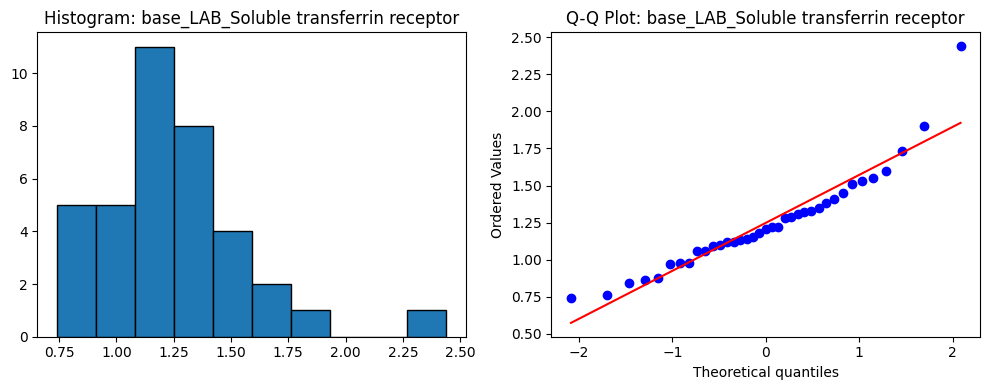

base_LAB_Hemoglobin: Shapiro-Wilk W=0.966, p=0.306
  → base_LAB_Hemoglobin appears normally distributed.


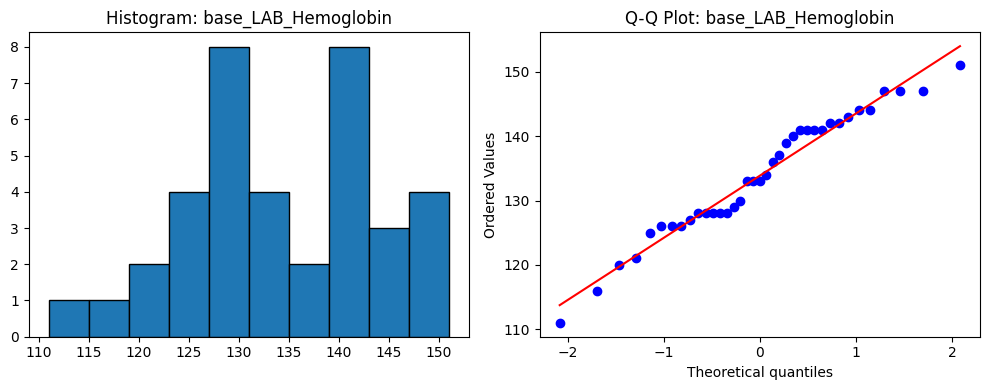

base_LAB_Ferritin: Shapiro-Wilk W=0.863, p=0.000
  → base_LAB_Ferritin is not normally distributed.


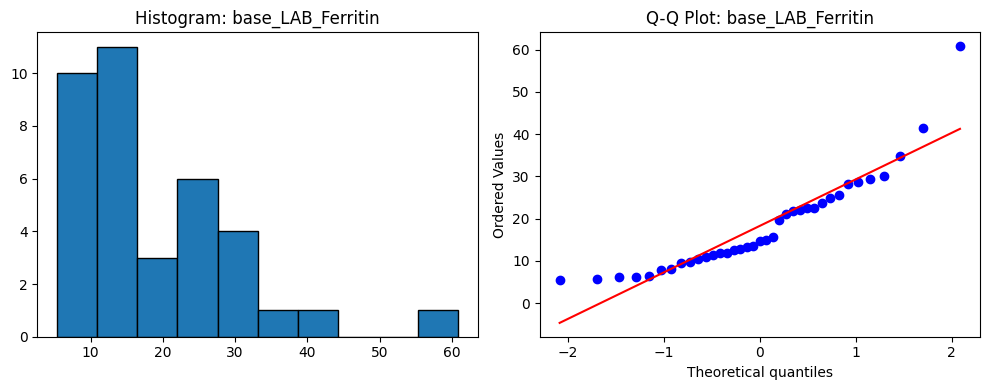

base_INTAKE_Iron(mg): Shapiro-Wilk W=0.933, p=0.028
  → base_INTAKE_Iron(mg) is not normally distributed.


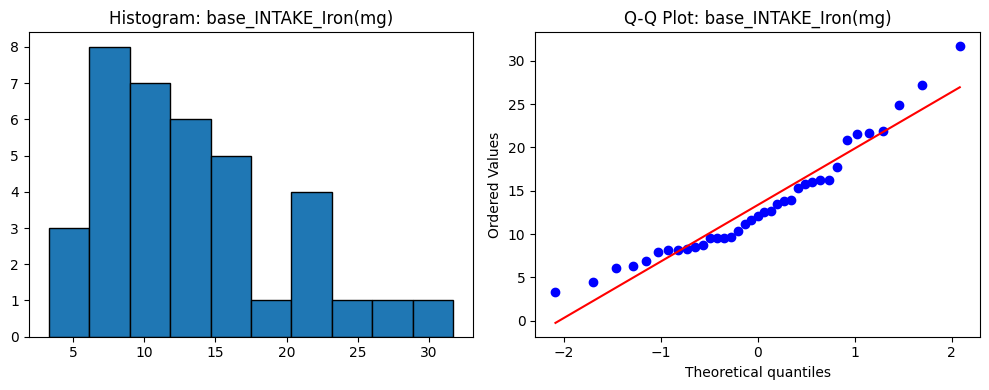


At least one variable is not normally distributed. Using Spearman correlation.


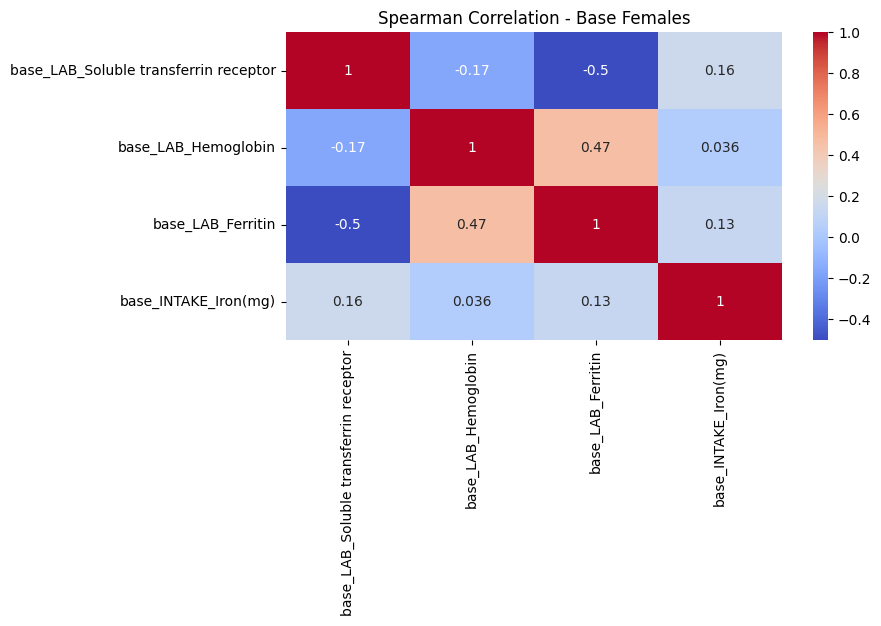

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

columns_of_interest = [
    'base_LAB_Soluble transferrin receptor',
    'base_LAB_Hemoglobin',
    'base_LAB_Ferritin',
    'base_INTAKE_Iron(mg)'
]

df = merged_base_no_nan_females[columns_of_interest].copy()

# --- Normality check section ---
any_non_normal = False
for col in columns_of_interest:
    data = df[col].dropna()
    stat, p = shapiro(data)
    print(f"{col}: Shapiro-Wilk W={stat:.3f}, p={p:.3f}")
    if p < 0.05:
        any_non_normal = True
        print(f"  → {col} is not normally distributed.")
    else:
        print(f"  → {col} appears normally distributed.")
    # (Optional) Plot histogram and Q-Q plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=10, edgecolor='k')
    plt.title(f'Histogram: {col}')
    plt.subplot(1, 2, 2)
    probplot(data, dist='norm', plot=plt)
    plt.title(f'Q-Q Plot: {col}')
    plt.tight_layout()
    plt.show()

# --- Correlation calculation section ---
if any_non_normal:
    print("\nAt least one variable is not normally distributed. Using Spearman correlation.")
    corr_matrix = df.corr(method='spearman')
    corr_title = "Spearman Correlation - Base Females"
else:
    print("\nAll variables appear normally distributed. Using Pearson correlation.")
    corr_matrix = df.corr(method='pearson')
    corr_title = "Pearson Correlation - Base Females"

# --- Heatmap visualization ---
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(corr_title)
plt.show()


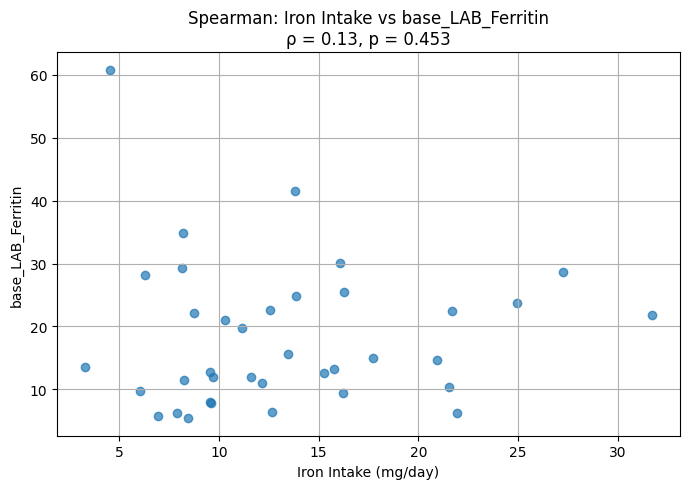

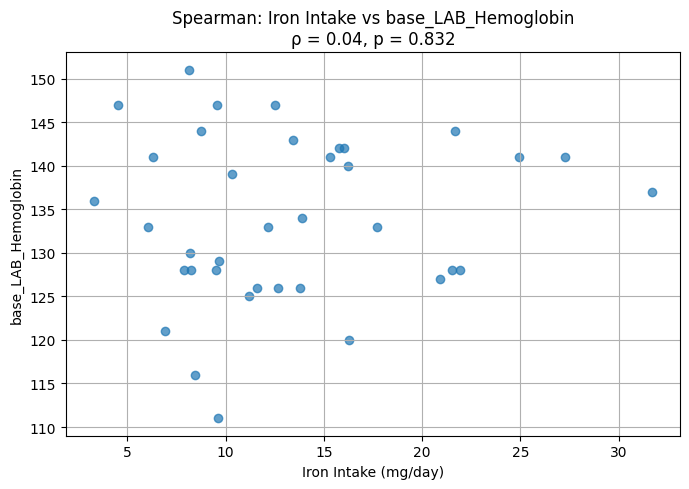

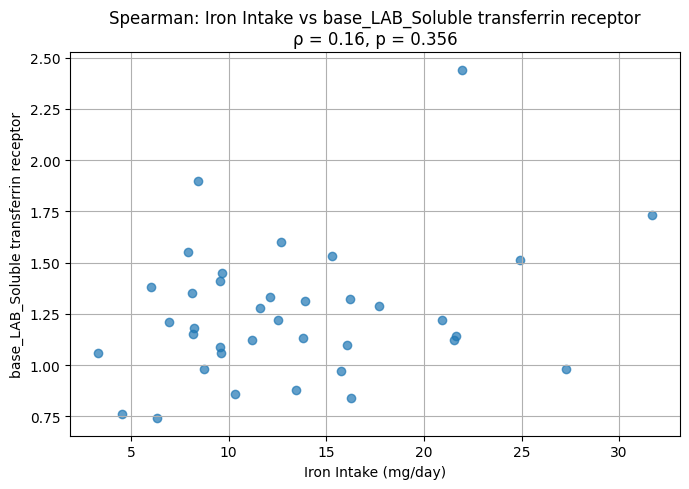


Correlation (intake vs biomarker):
base_LAB_Ferritin: ρ = 0.13, p = 0.453
base_LAB_Hemoglobin: ρ = 0.04, p = 0.832
base_LAB_Soluble transferrin receptor: ρ = 0.16, p = 0.356


In [60]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

columns = [
    'base_INTAKE_Iron(mg)', 
    'base_LAB_Ferritin', 
    'base_LAB_Hemoglobin', 
    'base_LAB_Soluble transferrin receptor'
]
df = merged_base_no_nan_females[columns].copy()

# Choose Spearman if any variable is non-normal based on previous tests:
corr_method = 'spearman'  # Change to 'pearson' if appropriate

# Correlation matrix just for intake vs biomarkers
corr_values = {}
for biomarker in columns[1:]:
    if corr_method == 'spearman':
        coef, p = spearmanr(df['base_INTAKE_Iron(mg)'], df[biomarker], nan_policy='omit')
        label = 'Spearman'
    else:
        coef, p = pearsonr(df['base_INTAKE_Iron(mg)'], df[biomarker])
        label = 'Pearson'
    corr_values[biomarker] = (coef, p)
    # Scatter plot
    plt.figure(figsize=(7, 5))
    plt.scatter(df['base_INTAKE_Iron(mg)'], df[biomarker], alpha=0.7)
    plt.title(f"{label}: Iron Intake vs {biomarker}\n"
              f"ρ = {coef:.2f}, p = {p:.3f}")
    plt.xlabel('Iron Intake (mg/day)')
    plt.ylabel(biomarker)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print correlation coefficients (can be shown as a mini-table)
print("\nCorrelation (intake vs biomarker):")
for biomarker, (coef, p) in corr_values.items():
    print(f"{biomarker}: ρ = {coef:.2f}, p = {p:.3f}")


here we performed correlation in base_females

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_LAB_Soluble transferrin receptor: Shapiro-Wilk W=0.215, p=0.000
  → base_LAB_Soluble transferrin receptor is not normally distributed.


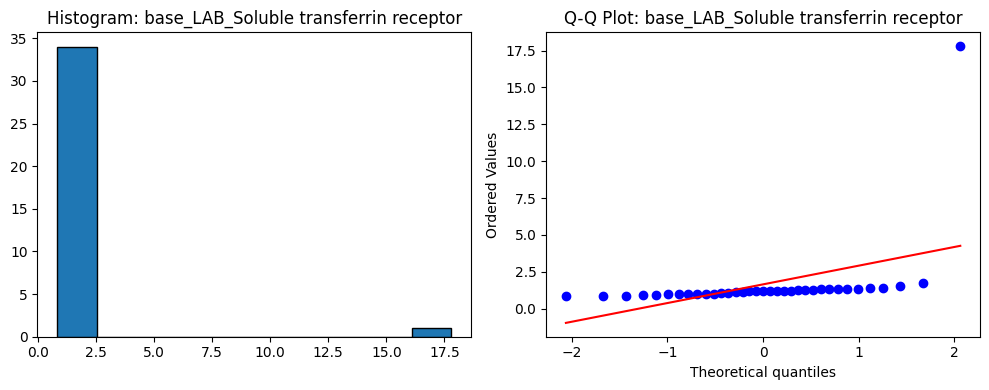

base_LAB_Hemoglobin: Shapiro-Wilk W=0.473, p=0.000
  → base_LAB_Hemoglobin is not normally distributed.


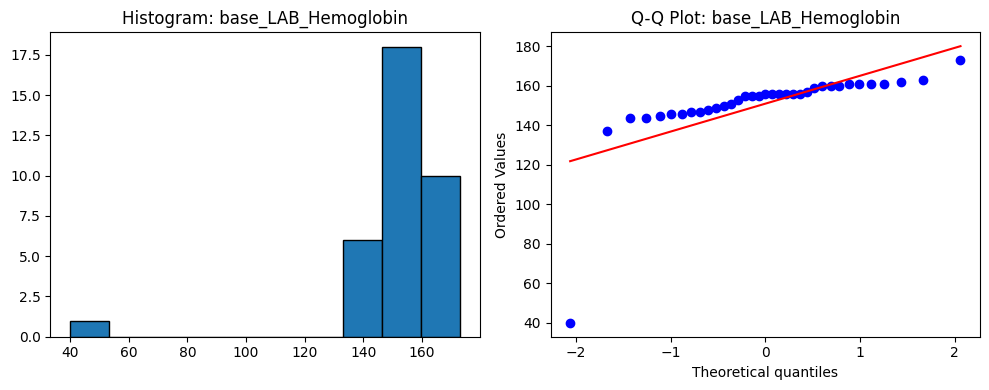

base_LAB_Ferritin: Shapiro-Wilk W=0.849, p=0.000
  → base_LAB_Ferritin is not normally distributed.


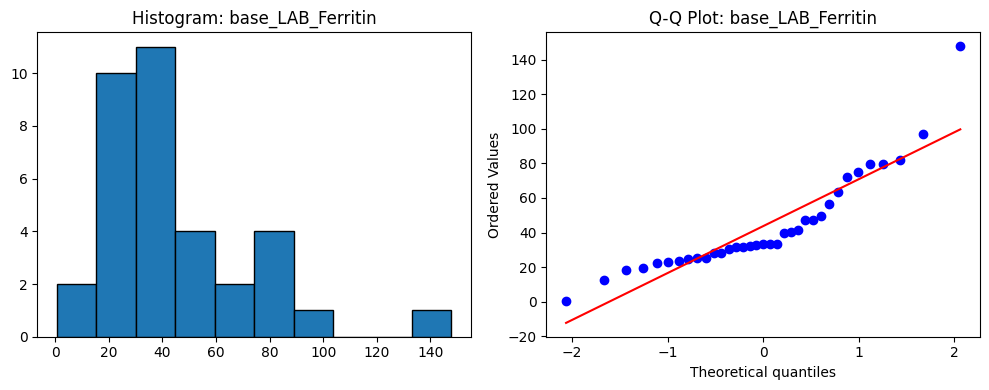

base_INTAKE_Iron(mg): Shapiro-Wilk W=0.907, p=0.006
  → base_INTAKE_Iron(mg) is not normally distributed.


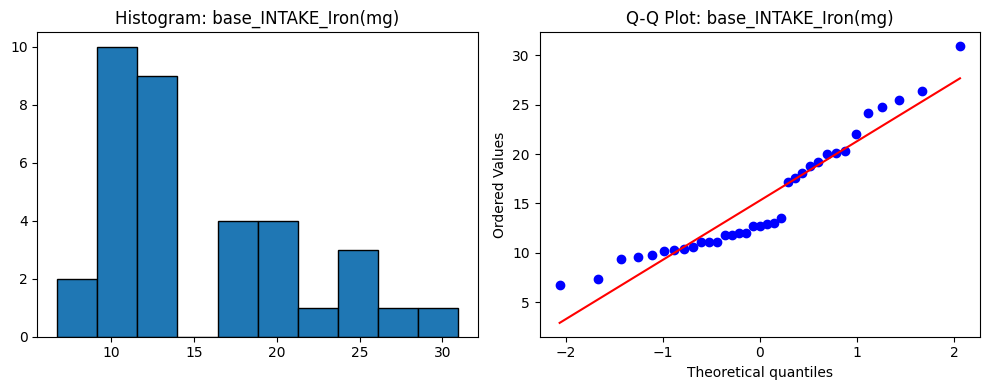


At least one variable is not normally distributed. Using Spearman correlation.


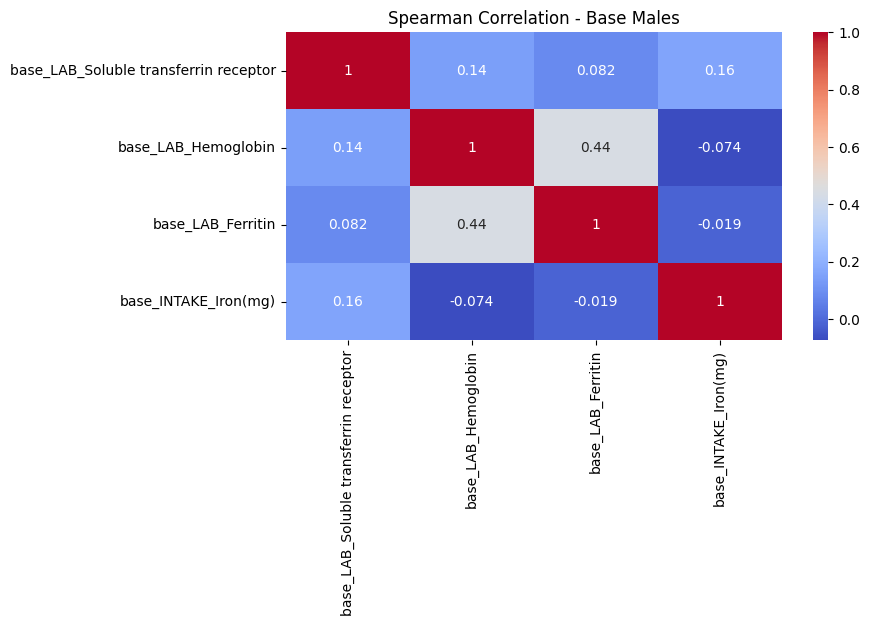

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

columns_of_interest = [
    'base_LAB_Soluble transferrin receptor',
    'base_LAB_Hemoglobin',
    'base_LAB_Ferritin',
    'base_INTAKE_Iron(mg)'
]

df = merged_base_no_nan_males[columns_of_interest].copy()

# --- Normality check section ---
any_non_normal = False
for col in columns_of_interest:
    data = df[col].dropna()
    stat, p = shapiro(data)
    print(f"{col}: Shapiro-Wilk W={stat:.3f}, p={p:.3f}")
    if p < 0.05:
        any_non_normal = True
        print(f"  → {col} is not normally distributed.")
    else:
        print(f"  → {col} appears normally distributed.")
    # (Optional) Plot histogram and Q-Q plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=10, edgecolor='k')
    plt.title(f'Histogram: {col}')
    plt.subplot(1, 2, 2)
    probplot(data, dist='norm', plot=plt)
    plt.title(f'Q-Q Plot: {col}')
    plt.tight_layout()
    plt.show()

# --- Correlation calculation section ---
if any_non_normal:
    print("\nAt least one variable is not normally distributed. Using Spearman correlation.")
    corr_matrix = df.corr(method='spearman')
    corr_title = "Spearman Correlation - Base Males"
else:
    print("\nAll variables appear normally distributed. Using Pearson correlation.")
    corr_matrix = df.corr(method='pearson')
    corr_title = "Pearson Correlation - Base Males"

# --- Heatmap visualization ---
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(corr_title)
plt.show()


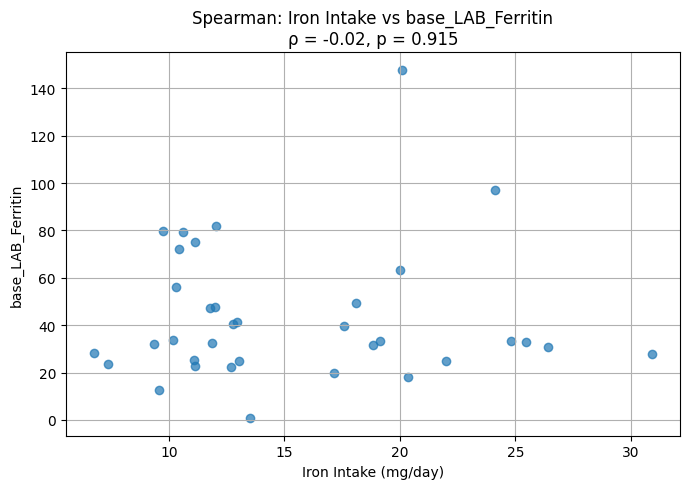

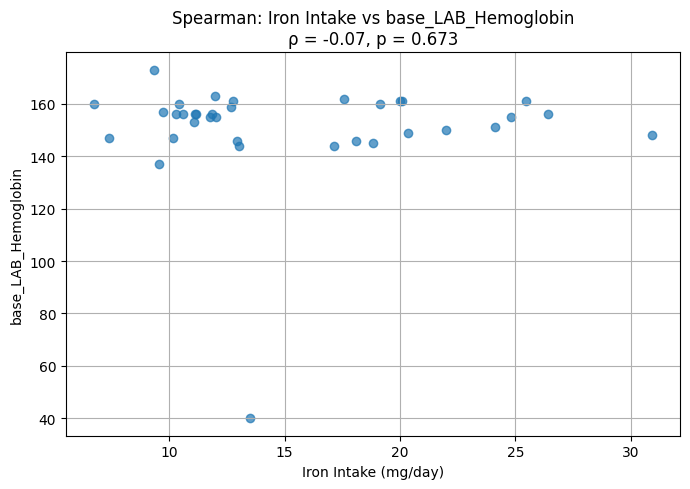

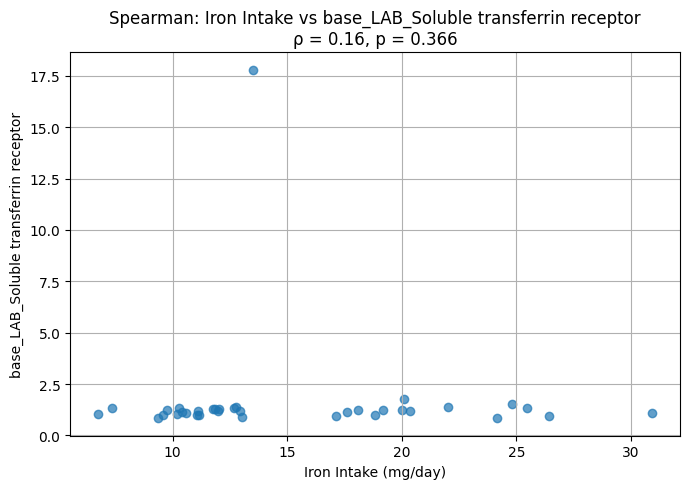


Correlation (intake vs biomarker):
base_LAB_Ferritin: ρ = -0.02, p = 0.915
base_LAB_Hemoglobin: ρ = -0.07, p = 0.673
base_LAB_Soluble transferrin receptor: ρ = 0.16, p = 0.366


In [63]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

columns = [
    'base_INTAKE_Iron(mg)', 
    'base_LAB_Ferritin', 
    'base_LAB_Hemoglobin', 
    'base_LAB_Soluble transferrin receptor'
]

# Use baseline males DataFrame
df = merged_base_no_nan_males[columns].copy()

# Choose correlation method (change to 'pearson' if data is normal)
corr_method = 'spearman'  # update if normality checks indicate Pearson is preferred

corr_values = {}
for biomarker in columns[1:]:
    if corr_method == 'spearman':
        coef, p = spearmanr(df['base_INTAKE_Iron(mg)'], df[biomarker], nan_policy='omit')
        label = 'Spearman'
    else:
        coef, p = pearsonr(df['base_INTAKE_Iron(mg)'], df[biomarker])
        label = 'Pearson'
    corr_values[biomarker] = (coef, p)
    # Scatter plot
    plt.figure(figsize=(7, 5))
    plt.scatter(df['base_INTAKE_Iron(mg)'], df[biomarker], alpha=0.7)
    plt.title(f"{label}: Iron Intake vs {biomarker}\n"
              f"ρ = {coef:.2f}, p = {p:.3f}")
    plt.xlabel('Iron Intake (mg/day)')
    plt.ylabel(biomarker)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print correlation coefficients
print("\nCorrelation (intake vs biomarker):")
for biomarker, (coef, p) in corr_values.items():
    print(f"{biomarker}: ρ = {coef:.2f}, p = {p:.3f}")


here we performed correlation in base_males 

# Ferritin ↔ Iron intake correlation is usually weak in real data due to absorption variation.

# sTfR normally inversely correlates with iron stores:
→ higher sTfR = lower iron stores.

here we continue preparing data for the same but follow up version

In [39]:
merged_follow_up_no_nan

,follow_up_LAB_ID_ID,follow_up_LAB_Iron,follow_up_LAB_Total iron-binding capacity,follow_up_LAB_Transferrin,follow_up_LAB_Transferrin saturation,follow_up_LAB_Transferrin index,follow_up_LAB_Soluble transferrin receptor,follow_up_LAB_Ferritin,follow_up_LAB_Hemoglobin,follow_up_LAB_Red blood cells,follow_up_LAB_Hematocrit,follow_up_LAB_Mean corpuscular volume,follow_up_LAB_FEMALE/MALE,follow_up_INTAKE_ID_ID,follow_up_INTAKE_Iron(mg)
2,K7R3,15.8,78.0,3.09,20.4,2.17,1.33,4.1,126.0,4.42,0.385,87.1,F,K7R3,11.329698
3,K15R6,16.2,61.0,2.41,26.8,0.91,1.33,28.5,151.0,4.91,0.435,88.6,M,K15R6,11.516336
4,K16R6,20.5,66.0,2.63,31.0,0.70,1.06,32.7,125.0,4.18,0.366,87.6,F,K16R6,8.178908
5,K18R7,22.0,66.0,2.63,33.3,0.74,1.17,37.6,155.0,4.92,0.421,85.6,M,K18R7,17.865120
6,K19R7,22.2,61.0,2.42,36.5,0.68,0.92,22.2,123.0,4.13,0.363,87.9,F,K19R7,12.530420
7,K25R9,19.5,97.0,3.83,20.3,1.76,1.68,9.0,141.0,4.75,0.417,87.8,M,K25R9,12.512165
8,K26R9,13.4,69.0,2.72,19.6,0.79,0.95,15.7,128.0,4.31,0.376,87.2,F,K26R9,12.261111
10,K34R12,23.3,59.0,2.35,39.5,0.58,0.97,46.2,151.0,4.86,0.440,90.5,M,K34R12,4.384073
11,K35R12,9.7,76.0,3.03,12.7,1.17,1.49,19.0,129.0,4.49,0.389,86.6,F,K35R12,8.348134
14,K48R16,17.1,59.0,2.35,29.0,0.69,1.08,36.4,141.0,4.56,0.409,89.7,M,K48R16,16.732477


# HERE ARE DATA PREPARED FOR FIRST ANALYSIS MALES/FEMALES follow up INTAKE VS LAB DATA ↓↓↓↓↓↓↓↓↓↓↓

In [40]:
merged_follow_up_no_nan_females = merged_follow_up_no_nan[merged_follow_up_no_nan['follow_up_LAB_FEMALE/MALE'] == 'F']
merged_follow_up_no_nan_males   = merged_follow_up_no_nan[merged_follow_up_no_nan['follow_up_LAB_FEMALE/MALE'] == 'M']

merged_follow_up_no_nan_females

,follow_up_LAB_ID_ID,follow_up_LAB_Iron,follow_up_LAB_Total iron-binding capacity,follow_up_LAB_Transferrin,follow_up_LAB_Transferrin saturation,follow_up_LAB_Transferrin index,follow_up_LAB_Soluble transferrin receptor,follow_up_LAB_Ferritin,follow_up_LAB_Hemoglobin,follow_up_LAB_Red blood cells,follow_up_LAB_Hematocrit,follow_up_LAB_Mean corpuscular volume,follow_up_LAB_FEMALE/MALE,follow_up_INTAKE_ID_ID,follow_up_INTAKE_Iron(mg)
2,K7R3,15.8,78.0,3.09,20.4,2.17,1.33,4.1,126.0,4.42,0.385,87.1,F,K7R3,11.329698
4,K16R6,20.5,66.0,2.63,31.0,0.70,1.06,32.7,125.0,4.18,0.366,87.6,F,K16R6,8.178908
6,K19R7,22.2,61.0,2.42,36.5,0.68,0.92,22.2,123.0,4.13,0.363,87.9,F,K19R7,12.530420
8,K26R9,13.4,69.0,2.72,19.6,0.79,0.95,15.7,128.0,4.31,0.376,87.2,F,K26R9,12.261111
11,K35R12,9.7,76.0,3.03,12.7,1.17,1.49,19.0,129.0,4.49,0.389,86.6,F,K35R12,8.348134
15,K49R16,10.1,63.0,2.49,16.1,1.34,2.08,35.4,137.0,4.85,0.408,84.1,F,K49R16,8.896853
19,K56R18,16.6,64.0,2.54,26.0,1.11,1.62,28.8,143.0,4.41,0.414,93.9,F,K56R18,5.220058
21,K62R20,20.9,76.0,3.02,27.5,0.72,0.95,20.6,131.0,4.68,0.398,85.0,F,K62R20,5.316054
25,K71R23,14.8,65.0,2.59,22.7,1.02,1.12,12.5,128.0,4.40,0.390,88.6,F,K71R23,5.332491
27,K74R24,16.5,69.0,2.75,23.9,1.09,1.37,18.3,135.0,4.32,0.396,91.7,F,K74R24,3.613500


# merged intake and lab follow up FEMALES

In [41]:
merged_follow_up_no_nan_males

,follow_up_LAB_ID_ID,follow_up_LAB_Iron,follow_up_LAB_Total iron-binding capacity,follow_up_LAB_Transferrin,follow_up_LAB_Transferrin saturation,follow_up_LAB_Transferrin index,follow_up_LAB_Soluble transferrin receptor,follow_up_LAB_Ferritin,follow_up_LAB_Hemoglobin,follow_up_LAB_Red blood cells,follow_up_LAB_Hematocrit,follow_up_LAB_Mean corpuscular volume,follow_up_LAB_FEMALE/MALE,follow_up_INTAKE_ID_ID,follow_up_INTAKE_Iron(mg)
3,K15R6,16.2,61.0,2.41,26.8,0.91,1.33,28.5,151.0,4.91,0.435,88.6,M,K15R6,11.516336
5,K18R7,22.0,66.0,2.63,33.3,0.74,1.17,37.6,155.0,4.92,0.421,85.6,M,K18R7,17.865120
7,K25R9,19.5,97.0,3.83,20.3,1.76,1.68,9.0,141.0,4.75,0.417,87.8,M,K25R9,12.512165
10,K34R12,23.3,59.0,2.35,39.5,0.58,0.97,46.2,151.0,4.86,0.440,90.5,M,K34R12,4.384073
14,K48R16,17.1,59.0,2.35,29.0,0.69,1.08,36.4,141.0,4.56,0.409,89.7,M,K48R16,16.732477
18,K55R18,30.7,63.0,2.51,48.7,0.64,0.97,32.2,164.0,5.49,0.468,85.2,M,K55R18,6.534613
20,K61R20,16.2,81.0,3.20,20.1,0.75,0.98,20.6,155.0,5.09,0.438,86.1,M,K61R20,4.362396
24,K70R23,28.1,73.0,2.91,38.4,0.77,1.11,28.2,164.0,5.24,0.486,92.7,M,K70R23,8.475930
26,K73R24,24.2,78.0,3.10,31.1,1.08,1.28,15.5,145.0,4.92,0.439,89.2,M,K73R24,4.780000
28,K81R26,7.1,51.0,2.04,13.9,0.61,1.15,76.3,149.0,5.33,0.444,83.3,M,K81R26,8.133017


# merged intake and lab follow up MALES

follow_up_LAB_Soluble transferrin receptor: Shapiro-Wilk W=0.949, p=0.252
  → follow_up_LAB_Soluble transferrin receptor appears normally distributed.


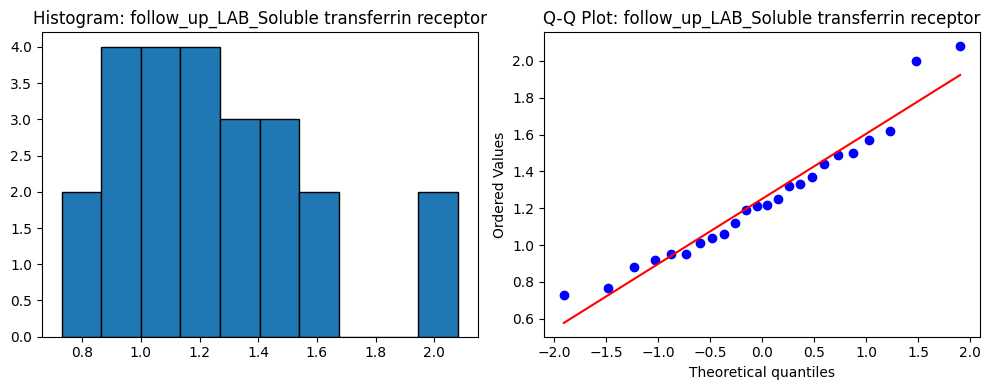

follow_up_LAB_Hemoglobin: Shapiro-Wilk W=0.945, p=0.188
  → follow_up_LAB_Hemoglobin appears normally distributed.


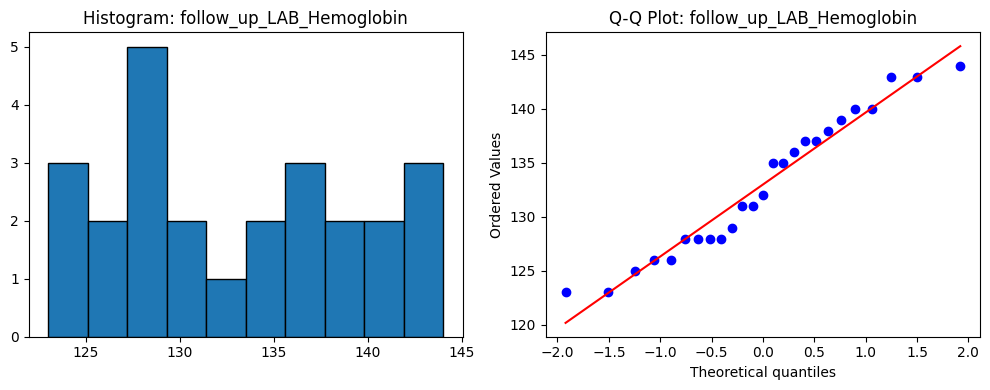

follow_up_LAB_Ferritin: Shapiro-Wilk W=0.940, p=0.146
  → follow_up_LAB_Ferritin appears normally distributed.


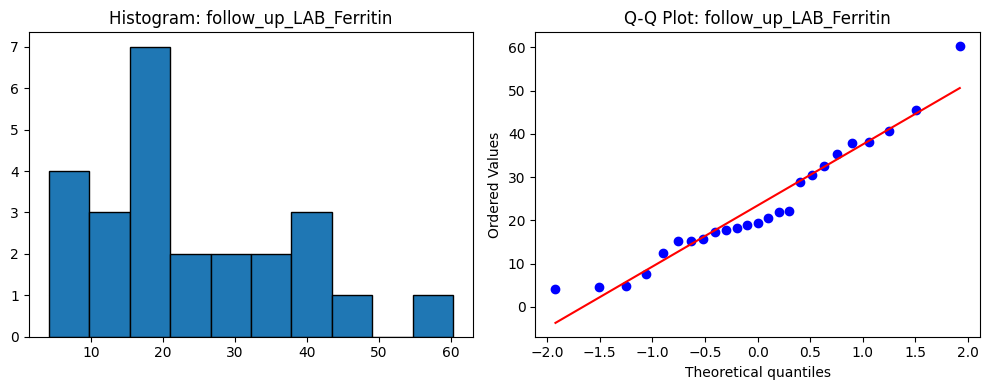

follow_up_INTAKE_Iron(mg): Shapiro-Wilk W=0.803, p=0.000
  → follow_up_INTAKE_Iron(mg) is not normally distributed.


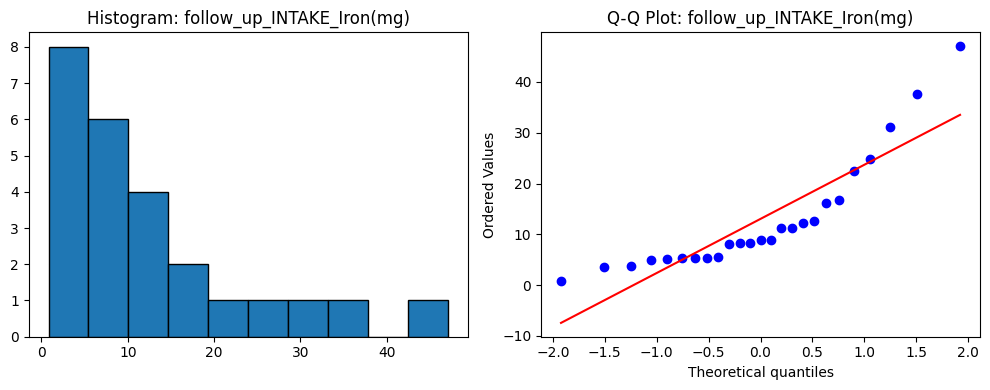


At least one variable is not normally distributed. Using Spearman correlation.


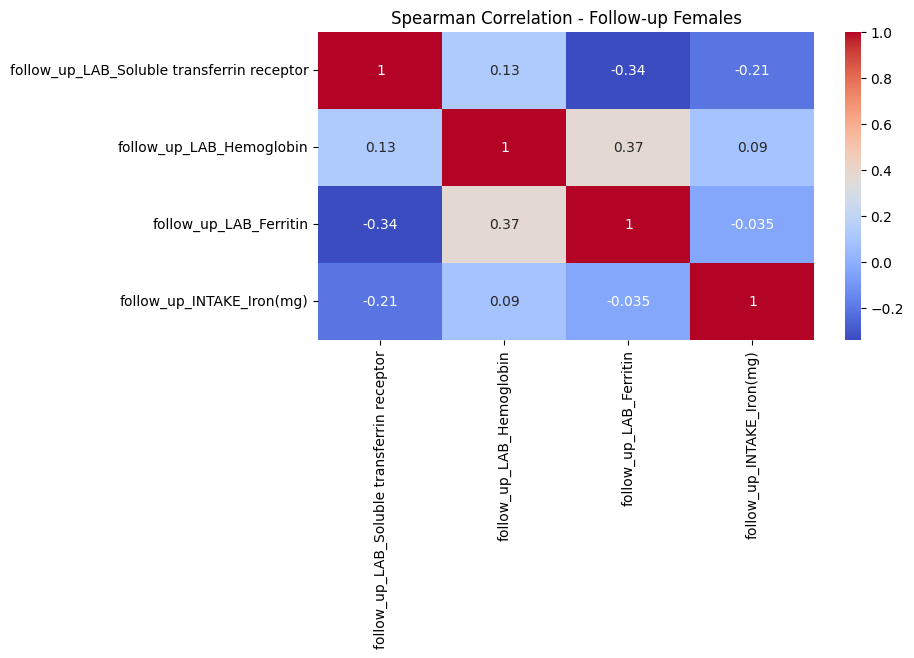

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

columns_of_interest = [
    'follow_up_LAB_Soluble transferrin receptor',
    'follow_up_LAB_Hemoglobin',
    'follow_up_LAB_Ferritin',
    'follow_up_INTAKE_Iron(mg)'
]

df = merged_follow_up_no_nan_females[columns_of_interest].copy()

# --- Normality check section ---
any_non_normal = False
for col in columns_of_interest:
    data = df[col].dropna()
    stat, p = shapiro(data)
    print(f"{col}: Shapiro-Wilk W={stat:.3f}, p={p:.3f}")
    if p < 0.05:
        any_non_normal = True
        print(f"  → {col} is not normally distributed.")
    else:
        print(f"  → {col} appears normally distributed.")
    # (Optional) Plot histogram and Q-Q plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=10, edgecolor='k')
    plt.title(f'Histogram: {col}')
    plt.subplot(1, 2, 2)
    probplot(data, dist='norm', plot=plt)
    plt.title(f'Q-Q Plot: {col}')
    plt.tight_layout()
    plt.show()

# --- Correlation calculation section ---
if any_non_normal:
    print("\nAt least one variable is not normally distributed. Using Spearman correlation.")
    corr_matrix = df.corr(method='spearman')
    corr_title = "Spearman Correlation - Follow-up Females"
else:
    print("\nAll variables appear normally distributed. Using Pearson correlation.")
    corr_matrix = df.corr(method='pearson')
    corr_title = "Pearson Correlation - Follow-up Females"

# --- Heatmap visualization ---
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(corr_title)
plt.show()


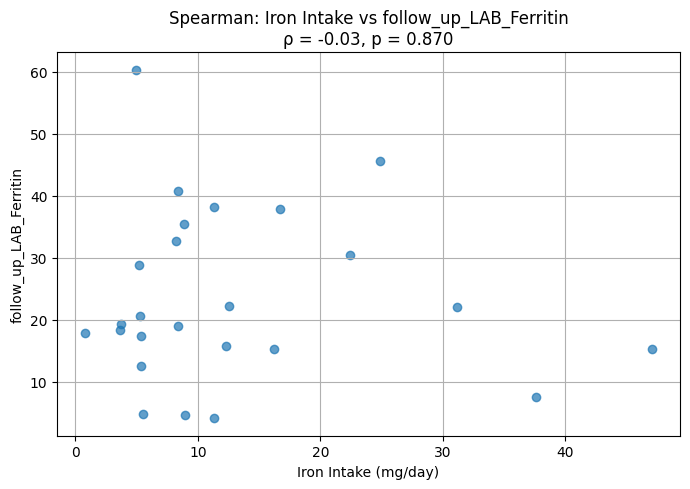

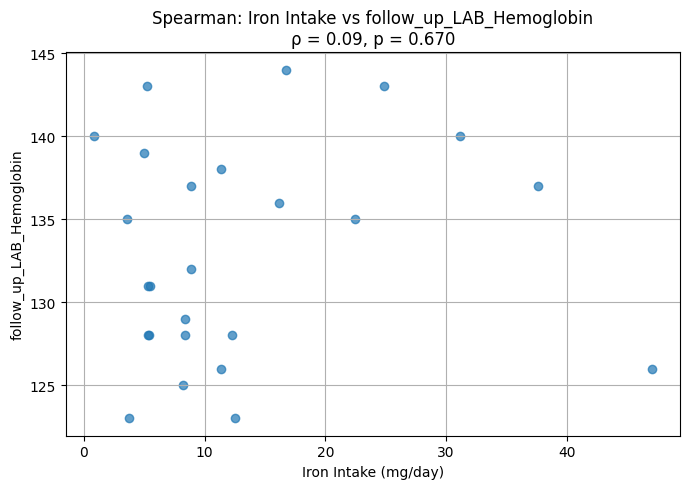

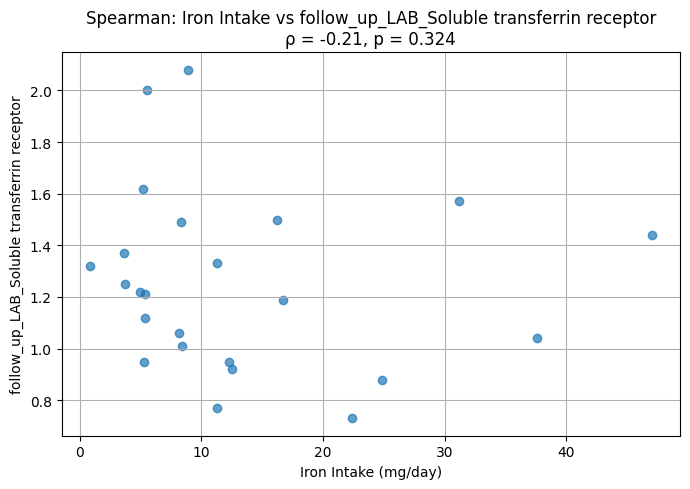


Correlation (intake vs biomarker):
follow_up_LAB_Ferritin: ρ = -0.03, p = 0.870
follow_up_LAB_Hemoglobin: ρ = 0.09, p = 0.670
follow_up_LAB_Soluble transferrin receptor: ρ = -0.21, p = 0.324


In [66]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

columns = [
    'follow_up_INTAKE_Iron(mg)', 
    'follow_up_LAB_Ferritin', 
    'follow_up_LAB_Hemoglobin', 
    'follow_up_LAB_Soluble transferrin receptor'
]

df = merged_follow_up_no_nan_females[columns].copy()

# Choose correlation method ('spearman' for non-normal, 'pearson' for normal data)
corr_method = 'spearman'  # update to 'pearson' if normality criteria are met

corr_values = {}
for biomarker in columns[1:]:
    if corr_method == 'spearman':
        coef, p = spearmanr(df['follow_up_INTAKE_Iron(mg)'], df[biomarker], nan_policy='omit')
        label = 'Spearman'
    else:
        coef, p = pearsonr(df['follow_up_INTAKE_Iron(mg)'], df[biomarker])
        label = 'Pearson'
    corr_values[biomarker] = (coef, p)
    # Scatter plot
    plt.figure(figsize=(7, 5))
    plt.scatter(df['follow_up_INTAKE_Iron(mg)'], df[biomarker], alpha=0.7)
    plt.title(f"{label}: Iron Intake vs {biomarker}\n"
              f"ρ = {coef:.2f}, p = {p:.3f}")
    plt.xlabel('Iron Intake (mg/day)')
    plt.ylabel(biomarker)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print correlation coefficients
print("\nCorrelation (intake vs biomarker):")
for biomarker, (coef, p) in corr_values.items():
    print(f"{biomarker}: ρ = {coef:.2f}, p = {p:.3f}")


here we performed correlation in followup_females

follow_up_LAB_Soluble transferrin receptor: Shapiro-Wilk W=0.961, p=0.455
  → follow_up_LAB_Soluble transferrin receptor appears normally distributed.


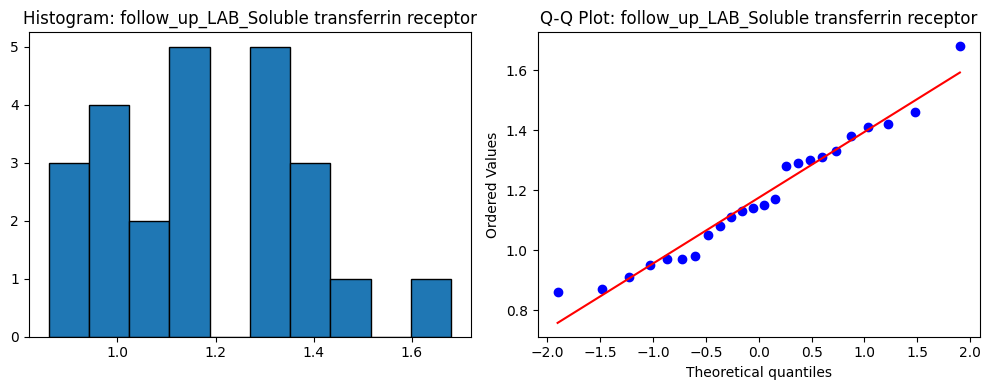

follow_up_LAB_Hemoglobin: Shapiro-Wilk W=0.946, p=0.226
  → follow_up_LAB_Hemoglobin appears normally distributed.


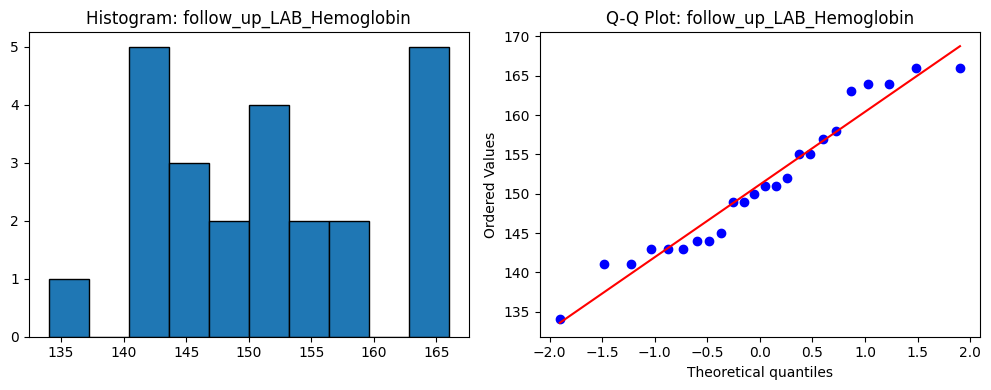

follow_up_LAB_Ferritin: Shapiro-Wilk W=0.807, p=0.000
  → follow_up_LAB_Ferritin is not normally distributed.


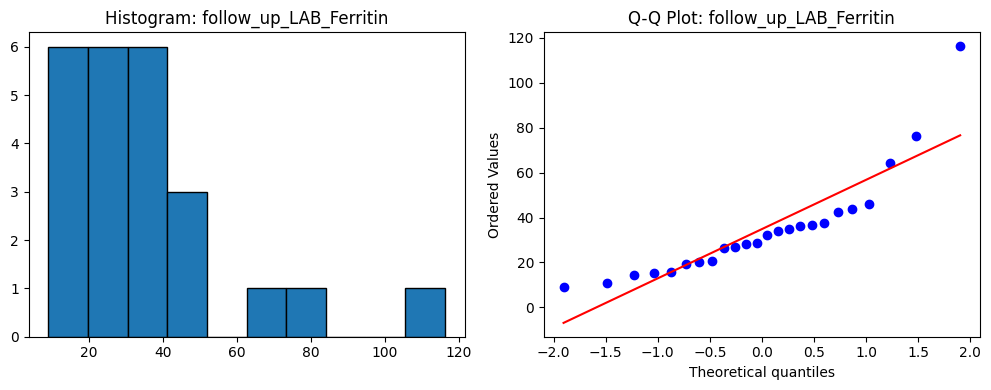

follow_up_INTAKE_Iron(mg): Shapiro-Wilk W=0.695, p=0.000
  → follow_up_INTAKE_Iron(mg) is not normally distributed.


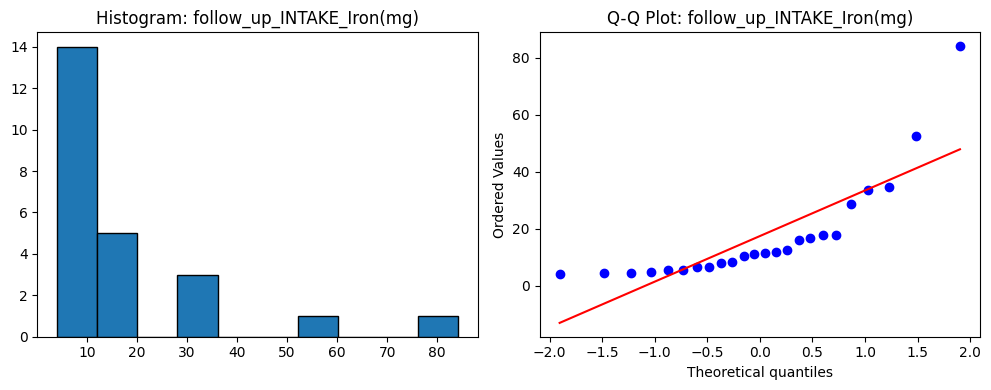


At least one variable is not normally distributed. Using Spearman correlation.


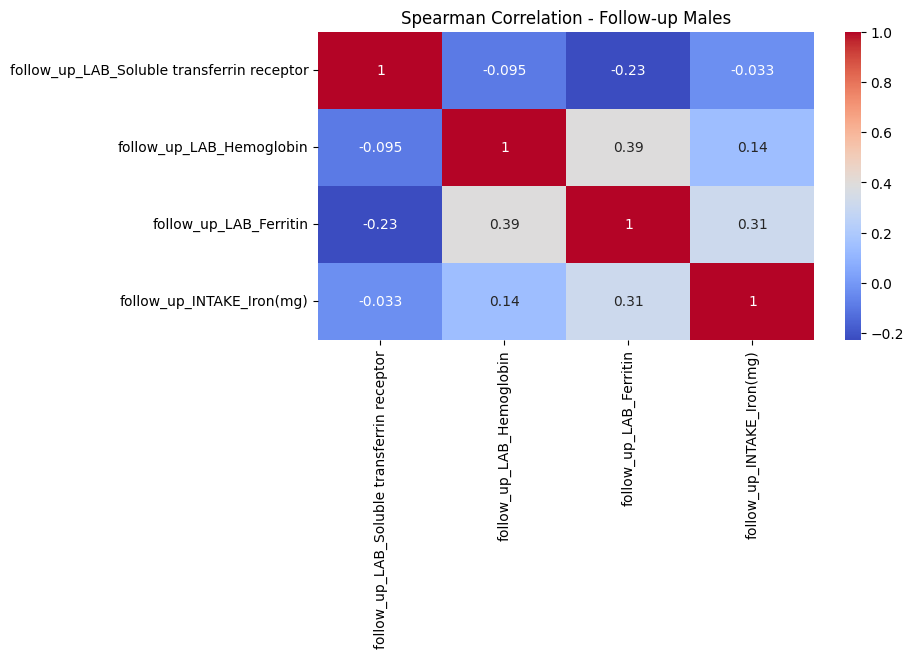

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

columns_of_interest = [
    'follow_up_LAB_Soluble transferrin receptor',
    'follow_up_LAB_Hemoglobin',
    'follow_up_LAB_Ferritin',
    'follow_up_INTAKE_Iron(mg)'
]

df = merged_follow_up_no_nan_males[columns_of_interest].copy()

# --- Normality check section ---
any_non_normal = False
for col in columns_of_interest:
    data = df[col].dropna()
    stat, p = shapiro(data)
    print(f"{col}: Shapiro-Wilk W={stat:.3f}, p={p:.3f}")
    if p < 0.05:
        any_non_normal = True
        print(f"  → {col} is not normally distributed.")
    else:
        print(f"  → {col} appears normally distributed.")
    # (Optional) Plot histogram and Q-Q plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=10, edgecolor='k')
    plt.title(f'Histogram: {col}')
    plt.subplot(1, 2, 2)
    probplot(data, dist='norm', plot=plt)
    plt.title(f'Q-Q Plot: {col}')
    plt.tight_layout()
    plt.show()

# --- Correlation calculation section ---
if any_non_normal:
    print("\nAt least one variable is not normally distributed. Using Spearman correlation.")
    corr_matrix = df.corr(method='spearman')
    corr_title = "Spearman Correlation - Follow-up Males"
else:
    print("\nAll variables appear normally distributed. Using Pearson correlation.")
    corr_matrix = df.corr(method='pearson')
    corr_title = "Pearson Correlation - Follow-up Males"

# --- Heatmap visualization ---
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(corr_title)
plt.show()


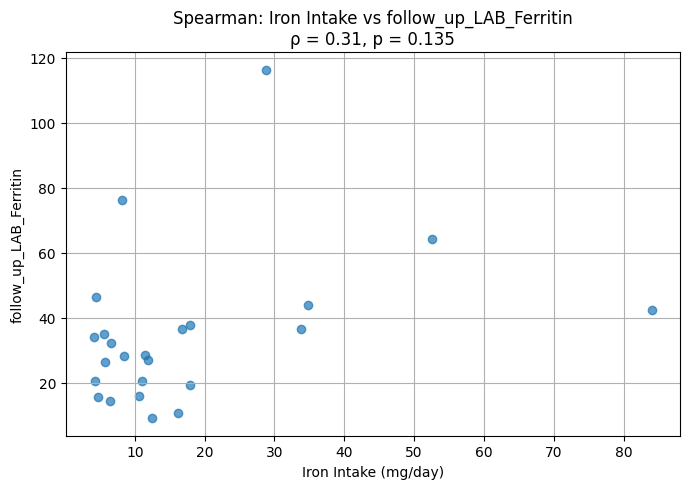

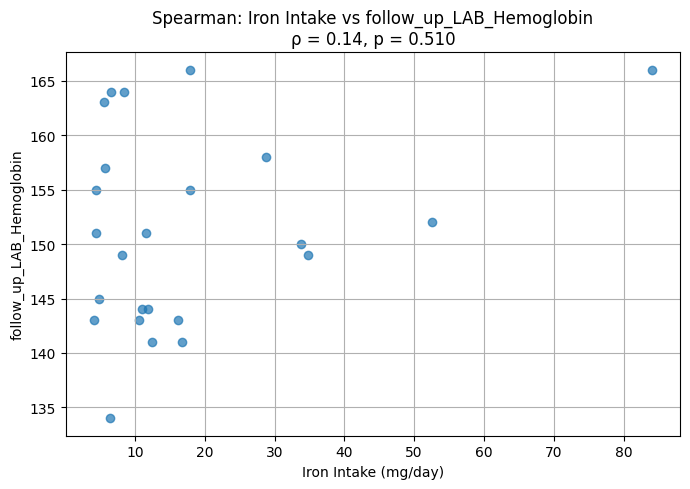

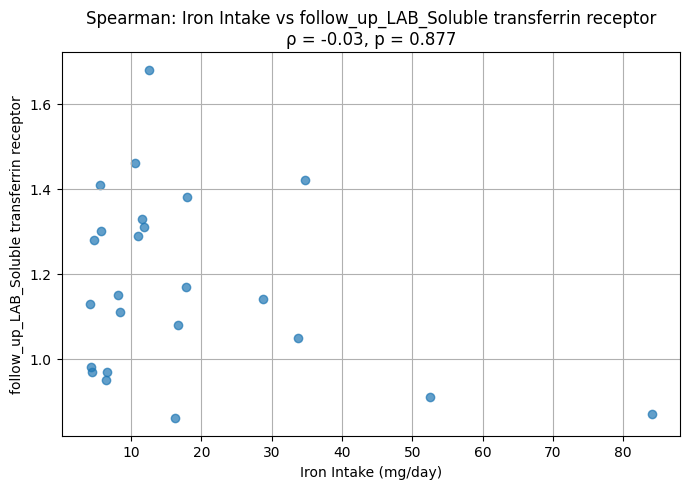


Correlation (intake vs biomarker):
follow_up_LAB_Ferritin: ρ = 0.31, p = 0.135
follow_up_LAB_Hemoglobin: ρ = 0.14, p = 0.510
follow_up_LAB_Soluble transferrin receptor: ρ = -0.03, p = 0.877


In [69]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

columns = [
    'follow_up_INTAKE_Iron(mg)', 
    'follow_up_LAB_Ferritin', 
    'follow_up_LAB_Hemoglobin', 
    'follow_up_LAB_Soluble transferrin receptor'
]

df = merged_follow_up_no_nan_males[columns].copy()

# Choose correlation method ('spearman' for non-normal, 'pearson' for normal data)
corr_method = 'spearman'  # update to 'pearson' if normality criteria are met

corr_values = {}
for biomarker in columns[1:]:
    if corr_method == 'spearman':
        coef, p = spearmanr(df['follow_up_INTAKE_Iron(mg)'], df[biomarker], nan_policy='omit')
        label = 'Spearman'
    else:
        coef, p = pearsonr(df['follow_up_INTAKE_Iron(mg)'], df[biomarker])
        label = 'Pearson'
    corr_values[biomarker] = (coef, p)
    # Scatter plot
    plt.figure(figsize=(7, 5))
    plt.scatter(df['follow_up_INTAKE_Iron(mg)'], df[biomarker], alpha=0.7)
    plt.title(f"{label}: Iron Intake vs {biomarker}\n"
              f"ρ = {coef:.2f}, p = {p:.3f}")
    plt.xlabel('Iron Intake (mg/day)')
    plt.ylabel(biomarker)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print correlation coefficients
print("\nCorrelation (intake vs biomarker):")
for biomarker, (coef, p) in corr_values.items():
    print(f"{biomarker}: ρ = {coef:.2f}, p = {p:.3f}")


here we performed correlation in followup_males

# tests showing linear regression is not needed

In [81]:
from scipy.stats import ttest_rel, wilcoxon

# Check for normality
from scipy.stats import shapiro
stat_iron, p_iron = shapiro(merged['base_INTAKE_Iron(mg)'])
stat_iron_fu, p_iron_fu = shapiro(merged['follow_up_INTAKE_Iron(mg)'])
stat_ferritin, p_ferritin = shapiro(merged['base_LAB_Ferritin'])
stat_ferritin_fu, p_ferritin_fu = shapiro(merged['follow_up_LAB_Ferritin'])

# Choose test based on normality (use 'Wilcoxon' if any p < 0.05)
if p_iron > 0.05 and p_iron_fu > 0.05:
    # Iron Intake
    t, p = ttest_rel(merged['base_INTAKE_Iron(mg)'], merged['follow_up_INTAKE_Iron(mg)'])
    print(f"Paired t-test Iron Intake: t={t:.2f}, p={p:.3f}")
else:
    # Iron Intake
    w, p = wilcoxon(merged['base_INTAKE_Iron(mg)'], merged['follow_up_INTAKE_Iron(mg)'])
    print(f"Wilcoxon Iron Intake: W={w:.2f}, p={p:.3f}")

if p_ferritin > 0.05 and p_ferritin_fu > 0.05:
    # Ferritin
    t, p = ttest_rel(merged['base_LAB_Ferritin'], merged['follow_up_LAB_Ferritin'])
    print(f"Paired t-test Ferritin: t={t:.2f}, p={p:.3f}")
else:
    # Ferritin
    w, p = wilcoxon(merged['base_LAB_Ferritin'], merged['follow_up_LAB_Ferritin'])
    print(f"Wilcoxon Ferritin: W={w:.2f}, p={p:.3f}")


Wilcoxon Iron Intake: W=125.00, p=0.709
Wilcoxon Ferritin: W=108.00, p=0.377


# Based on Wilcoxon signed-rank tests, there was no statistically significant change in iron intake (W = 125.00, p = 0.709) or serum ferritin (W = 108.00, p = 0.377) between baseline and follow-up. Therefore, regression analysis on change scores was not conducted.

In [84]:
from scipy.stats import ttest_rel, wilcoxon, shapiro

# Assume merged contains only matched male participants with both timepoints
# Columns: 'base_INTAKE_Iron(mg)', 'follow_up_INTAKE_Iron(mg)', 'base_LAB_Ferritin', 'follow_up_LAB_Ferritin'

# Normality checks
stat_iron, p_iron = shapiro(merged['base_INTAKE_Iron(mg)'])
stat_iron_fu, p_iron_fu = shapiro(merged['follow_up_INTAKE_Iron(mg)'])
stat_ferritin, p_ferritin = shapiro(merged['base_LAB_Ferritin'])
stat_ferritin_fu, p_ferritin_fu = shapiro(merged['follow_up_LAB_Ferritin'])

# Iron Intake
if p_iron > 0.05 and p_iron_fu > 0.05:
    t, p = ttest_rel(merged['base_INTAKE_Iron(mg)'], merged['follow_up_INTAKE_Iron(mg)'])
    print(f"Paired t-test Iron Intake: t={t:.2f}, p={p:.3f}")
else:
    w, p = wilcoxon(merged['base_INTAKE_Iron(mg)'], merged['follow_up_INTAKE_Iron(mg)'])
    print(f"Wilcoxon Iron Intake: W={w:.2f}, p={p:.3f}")

# Ferritin
if p_ferritin > 0.05 and p_ferritin_fu > 0.05:
    t, p = ttest_rel(merged['base_LAB_Ferritin'], merged['follow_up_LAB_Ferritin'])
    print(f"Paired t-test Ferritin: t={t:.2f}, p={p:.3f}")
else:
    w, p = wilcoxon(merged['base_LAB_Ferritin'], merged['follow_up_LAB_Ferritin'])
    print(f"Wilcoxon Ferritin: W={w:.2f}, p={p:.3f}")


Wilcoxon Iron Intake: W=125.00, p=0.709
Wilcoxon Ferritin: W=108.00, p=0.377


# Among males with matched baseline and follow-up data, Wilcoxon signed-rank tests indicated no significant change in iron intake (W = 125.00, p = 0.709) or ferritin (W = 108.00, p = 0.377) over time. Therefore, regression analysis on change scores was not performed.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=442c3d06-fa27-4eb9-95a5-3c4fa7c81d32' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>